In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("ARM_Cars.csv")

In [4]:
data.head()

,Price ($),Car,Date Posted,Year,Mileage,Vehicle Type,Transmission,Wheel left/right,Color
0,1200,VAZ(Lada) 2115,12.11.2019,2001,157000.0,Sedan,Manual,Left,Blue
1,1200,BMW 316,14.11.2019,1993,25000.0,Sedan,Manual,Left,Green
2,1200,VAZ(Lada) 2108,20.11.2019,1987,165000.0,Coupe,Manual,Left,Gray
3,1200,ErAZ 3218,30.11.2019,1992,80000.0,Estate,Manual,Left,Blue
4,1200,Chevrolet Cruze,19.11.2019,2002,120000.0,Hatchback,Automatic,Right,Silver


In [5]:
data.isnull().sum()

Price ($)           0
Car                 0
Date Posted         0
Year                0
Mileage             0
Vehicle Type        0
Transmission        0
Wheel left/right    0
Color               0
dtype: int64

## 1.1

In [6]:
#Using data manipulation techniques, clean the ‘Car’ column such that it only contains the make
#of the car (e.g., Volkswagen Jetta → Volkswagen, Chevrolet Malibu → Chevrolet). Identify car
#makes with the highest sales in Armenia. For this, you can create a barplot of the top 10 most
#selling cars.

In [7]:
for i in range(len(data)):
    data.loc[i,"Car"] = data["Car"][i].split()[0]
    if data["Car"][i] == "Rolls" :
        data.loc[i,"Car"] = "Rolls Royce"
    if data["Car"][i] == "Land" :
        data.loc[i,"Car"] = "Land Rover"
    if data["Car"][i] == "Aston" :
        data.loc[i,"Car"] = "Aston Martin"  
    if data["Car"][i] == "Alfa" :
        data.loc[i,"Car"] = "Alfa Romeo"    

In [8]:
data

,Price ($),Car,Date Posted,Year,Mileage,Vehicle Type,Transmission,Wheel left/right,Color
0,1200,VAZ(Lada),12.11.2019,2001,157000.0,Sedan,Manual,Left,Blue
1,1200,BMW,14.11.2019,1993,25000.0,Sedan,Manual,Left,Green
2,1200,VAZ(Lada),20.11.2019,1987,165000.0,Coupe,Manual,Left,Gray
3,1200,ErAZ,30.11.2019,1992,80000.0,Estate,Manual,Left,Blue
4,1200,Chevrolet,19.11.2019,2002,120000.0,Hatchback,Automatic,Right,Silver
...,...,...,...,...,...,...,...,...,...
8540,90000,Mercedes-Benz,20.11.2019,2016,30000.0,SUV,Automatic,Left,Black
8541,93000,Mercedes-Benz,21.11.2019,2017,11200.0,Estate,Automatic,Left,Black
8542,96000,Mercedes-Benz,02.12.2019,2015,77000.0,SUV,Automatic,Left,Black
8543,110000,Lexus,12.11.2019,2018,30000.0,Estate,Automatic,Left,Black


In [9]:
top_sales = dict(data["Car"].value_counts()[:10])
top_sales

{'Mercedes-Benz': 1538,
 'Toyota': 1216,
 'Opel': 951,
 'Nissan': 795,
 'BMW': 776,
 'Hyundai': 445,
 'Ford': 359,
 'Honda': 345,
 'Kia': 318,
 'Lexus': 308}

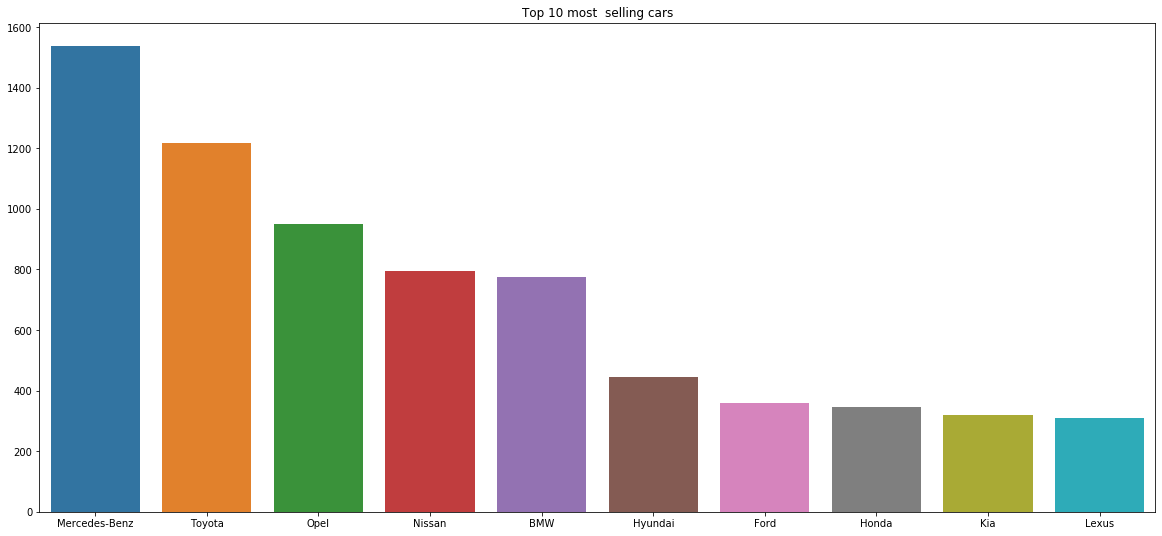

In [10]:
plt.figure(figsize = (20,9))
sns.barplot(list(top_sales.keys()),list(top_sales.values()))
plt.title("Top 10 most  selling cars")
plt.show()

## 1.2

In [11]:
# Calculate some summary statistics of car prices per car type (Volkswagen, Chevrolet, etc.). Create meaningful graphs.

In [12]:
data["Price ($)"].mean()

9776.411000585138

In [13]:
cars = list(data["Car"].unique())
mean_price = []
for i in cars:
    mean_price.append(round(data.where(data["Car"]==i , inplace = False).dropna()["Price ($)"].mean()))
mean_price = {cars[i]:mean_price[i] for i in range(len(cars))}    

In [14]:
mean_price

{'VAZ(Lada)': 2806,
 'BMW': 10249,
 'ErAZ': 1200,
 'Chevrolet': 10781,
 'Ford': 9523,
 'GAZ': 4369,
 'IZH': 1300,
 'Opel': 3504,
 'Volkswagen': 6816,
 'Mercedes-Benz': 11758,
 'Audi': 10094,
 'Niva': 5365,
 'Volvo': 8832,
 'Mitsubishi': 7545,
 'UAZ': 3729,
 'ZAZ-Tavria': 1700,
 'Nissan': 6534,
 'Seat': 1900,
 'Renault': 4680,
 'Suzuki': 5916,
 'Subaru': 7272,
 'Toyota': 12487,
 'Jeep': 10764,
 'Mazda': 10025,
 'Lexus': 21249,
 'Chrysler': 8463,
 'Hyundai': 8994,
 'Dodge': 10574,
 'Eagle': 2600,
 'Honda': 8466,
 'Kia': 9162,
 'Smart': 5850,
 'Ikco': 3000,
 'Fiat': 4750,
 'Peugeot': 4506,
 'Skoda': 9060,
 'Isuzu': 4167,
 'Land Rover': 25059,
 'Infiniti': 11816,
 'Mini': 9250,
 'Chery': 4800,
 'Citroen': 4500,
 'Acura': 17270,
 'Jaguar': 19000,
 'Cadillac': 9825,
 'Great': 5800,
 'Saturn': 6500,
 'Lincoln': 6700,
 'Porsche': 20873,
 'Foton': 8400,
 'Hummer': 15986,
 'Buick': 13500,
 'GMC': 11500,
 'Alpina': 17000,
 'Bentley': 39180,
 'Tesla': 50900,
 'Rolls Royce': 200000}

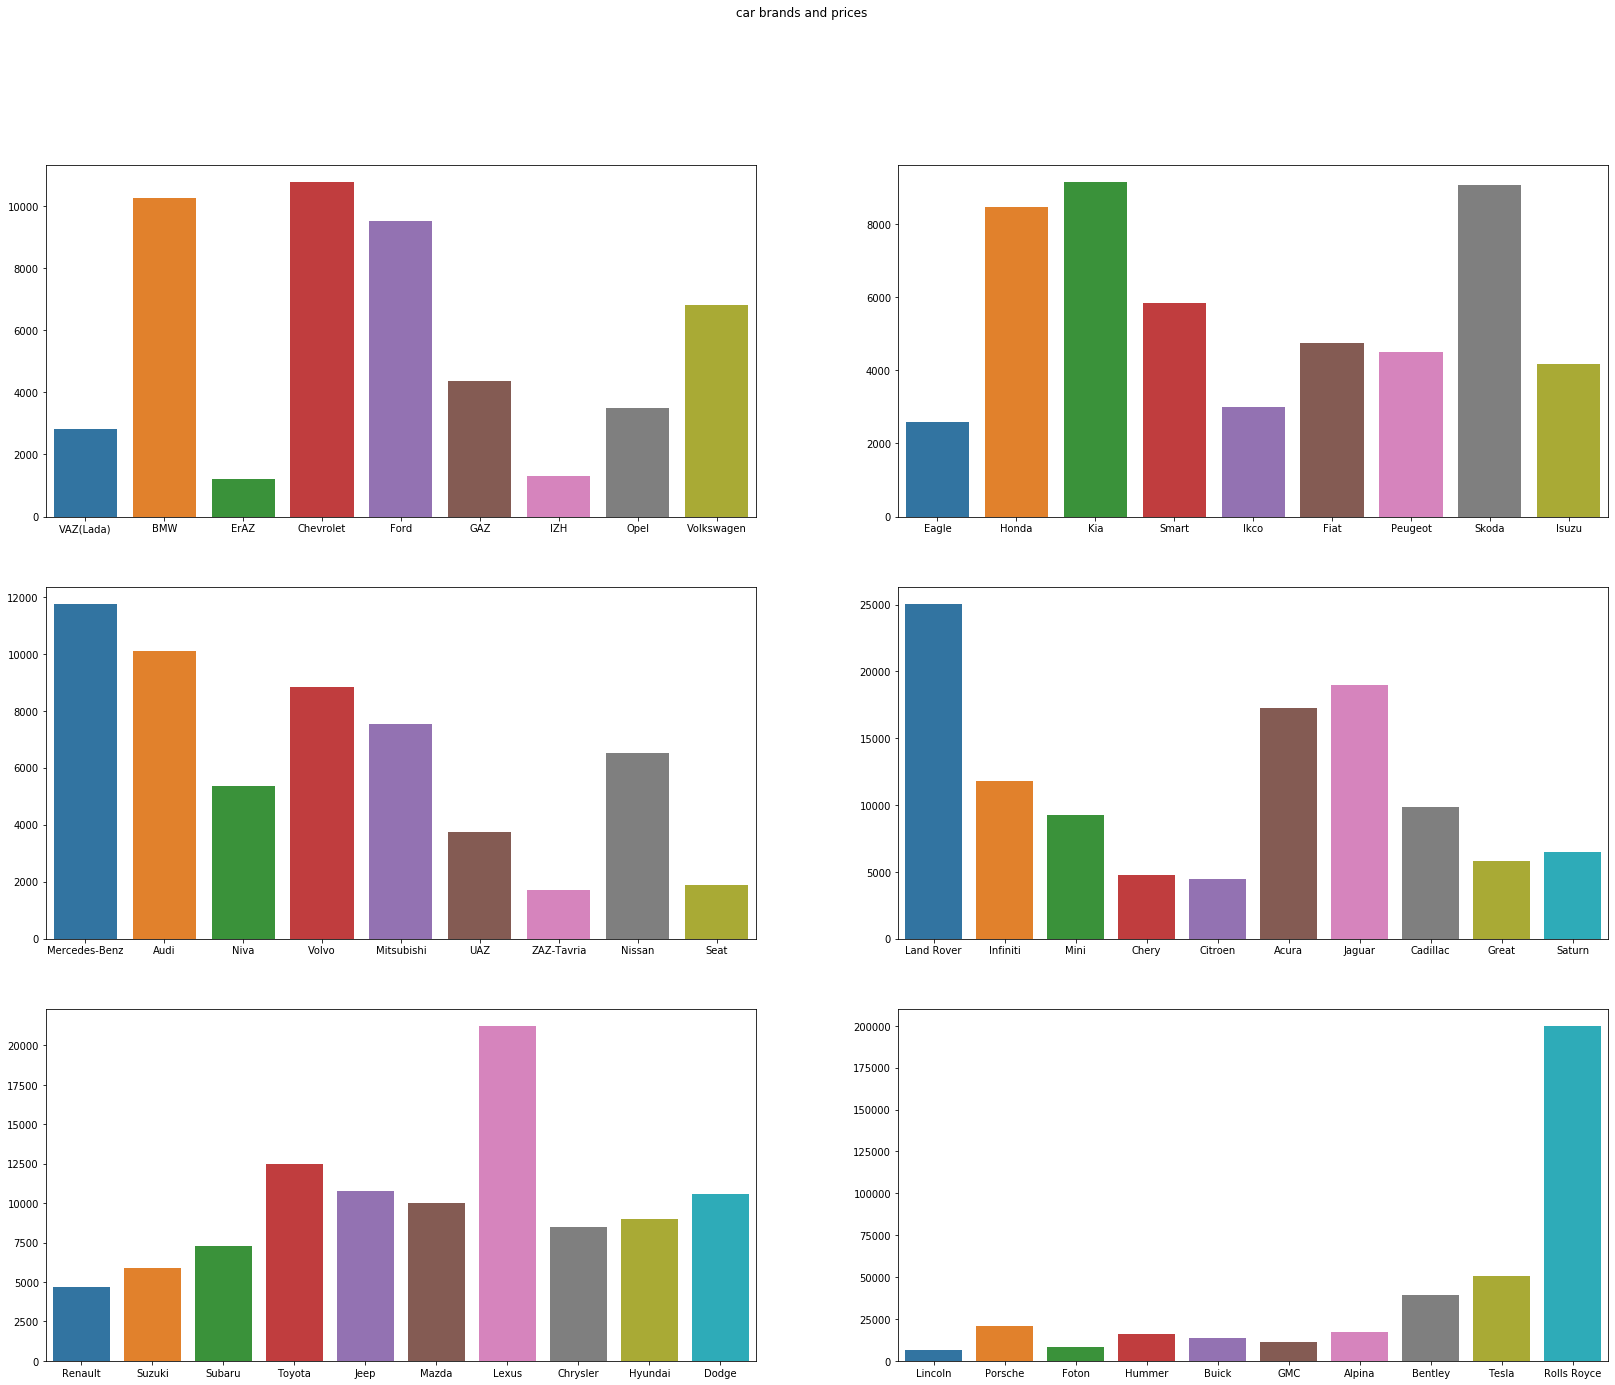

In [15]:
fig , axes = plt.subplots(3,2 ,  figsize = (28,22))
sns.barplot(ax = axes[0,0],x = list(mean_price.keys())[:9],y = list(mean_price.values())[:9])
sns.barplot(ax = axes[1,0],x = list(mean_price.keys())[9:18],y = list(mean_price.values())[9:18])
sns.barplot(ax = axes[2,0],x = list(mean_price.keys())[18:28],y = list(mean_price.values())[18:28])
sns.barplot(ax = axes[0,1],x = list(mean_price.keys())[28:37],y = list(mean_price.values())[28:37])
sns.barplot(ax = axes[1,1],x = list(mean_price.keys())[37:47],y = list(mean_price.values())[37:47])
sns.barplot(ax = axes[2,1],x = list(mean_price.keys())[47:],y = list(mean_price.values())[47:])
fig.suptitle("car brands and prices")
plt.show()

In [242]:
#From graph we can see that car's price is dependent on cars brand

## 1.3

In [17]:
# Identify how the year of a car is connected to the price.

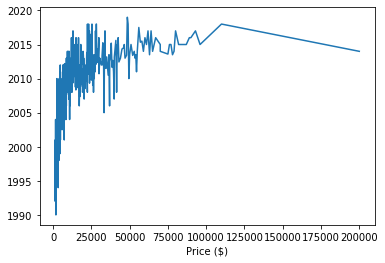

In [18]:
z = data.groupby("Price ($)").Year.mean()
z.plot()
plt.show()

In [243]:
#From graph we can see that expensive cars are usually new cars

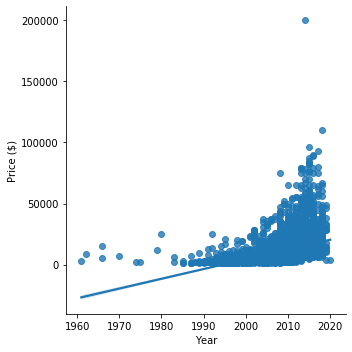

In [19]:
sns.lmplot(data = data,x = "Year", y = "Price ($)", order = 1)
plt.show()

In [ ]:
#this graph is not that imformative so lets create a graph for each brand

In [20]:
top_sales = list(top_sales.keys())

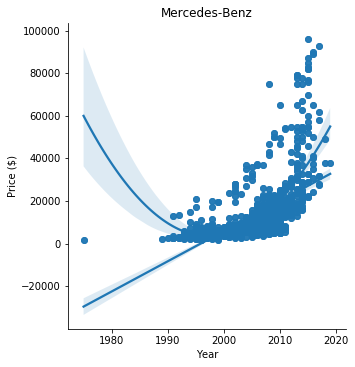

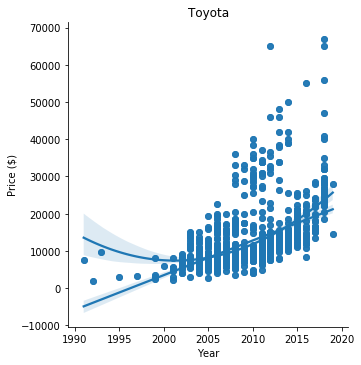

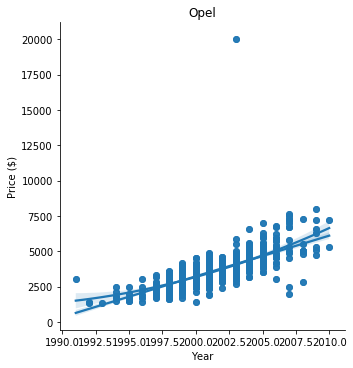

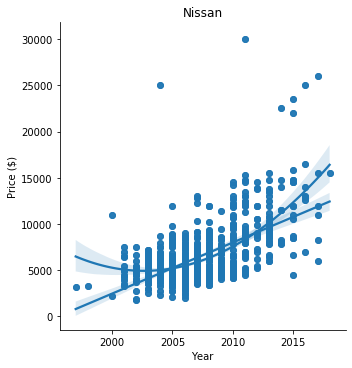

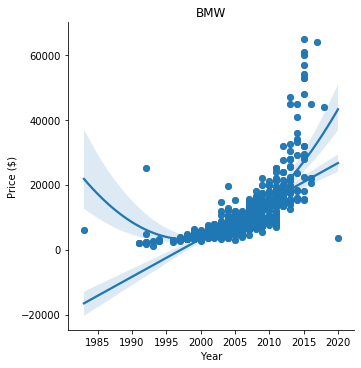

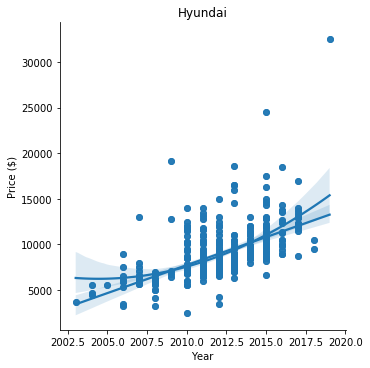

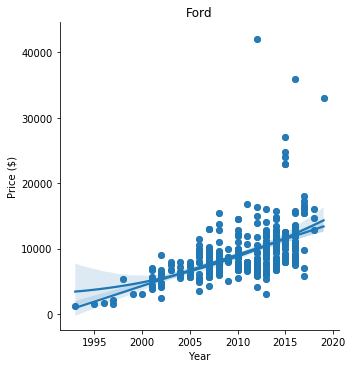

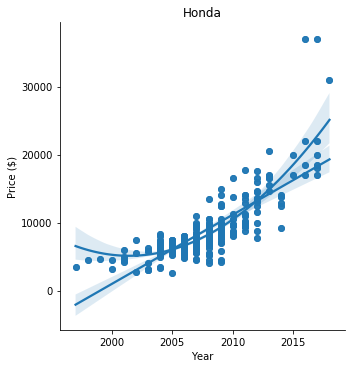

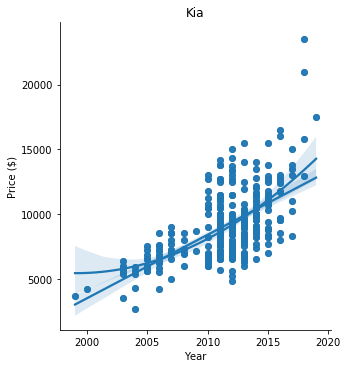

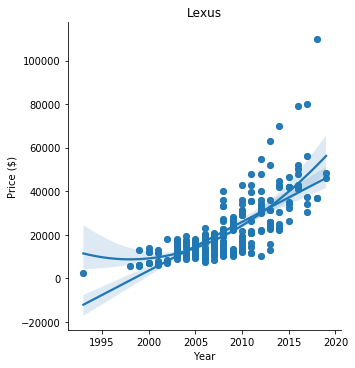

In [21]:
for i in top_sales:
    sns.lmplot(data = (data.where(data["Car"] ==i)).dropna(), x ="Year" , y = "Price ($)",order = 2)
    sns.regplot(data = (data.where(data["Car"] ==i)).dropna(), x ="Year" , y = "Price ($)")
    plt.title(i)
    

## 1.4-1.5

In [23]:
#Find relationships between variables in the data set. Use correlation analysis and different kinds of plots.
#Use any other EDA techniques to observe the data.

In [24]:
data.head()

,Price ($),Car,Date Posted,Year,Mileage,Vehicle Type,Transmission,Wheel left/right,Color
0,1200,VAZ(Lada),12.11.2019,2001,157000.0,Sedan,Manual,Left,Blue
1,1200,BMW,14.11.2019,1993,25000.0,Sedan,Manual,Left,Green
2,1200,VAZ(Lada),20.11.2019,1987,165000.0,Coupe,Manual,Left,Gray
3,1200,ErAZ,30.11.2019,1992,80000.0,Estate,Manual,Left,Blue
4,1200,Chevrolet,19.11.2019,2002,120000.0,Hatchback,Automatic,Right,Silver


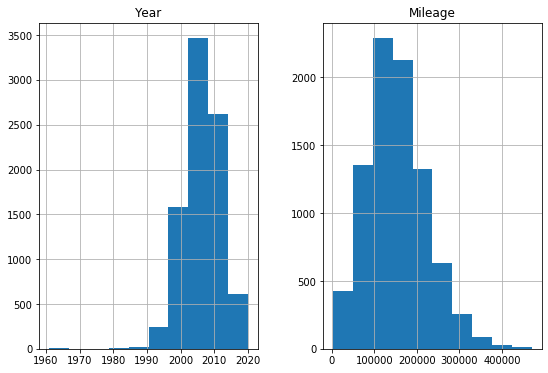

In [249]:
data.drop("Price ($)",axis = 1).hist(figsize = (9,6))
plt.show()

In [26]:
list_type = data["Vehicle Type"].unique()
list_trans = data["Transmission"].unique()
list_wheel = data["Wheel left/right"].unique()
list_color = data["Color"].unique()
list_car = data["Car"].unique()

In [27]:
for i in range(len(data)):
    for j in range(len(list_type)):
        if data["Vehicle Type"][i] == list_type[j]:
            data.loc[[i],["Vehicle Type"]] = j        

for i in range(len(data)):
    for j in range(len(list_trans)):
        if data["Transmission"][i] ==list_trans[j]:
            data.loc[[i],["Transmission"]] = j

for i in range(len(data)):
    for j in range(len(list_wheel)):
        if data["Wheel left/right"][i] == list_wheel[j]:
            data.loc[[i],["Wheel left/right"]] = j        

for i in range(len(data)):
    for j in range(len(list_color)):
        if data["Color"][i] ==list_color[j]:
            data.loc[[i],["Color"]] = j
for i in range(len(data)):
    for j in range(len(list_car)):
        if data["Car"][i] ==list_car[j]:
            data.loc[[i],["Car"]] = j            
data.head()                    

,Price ($),Car,Date Posted,Year,Mileage,Vehicle Type,Transmission,Wheel left/right,Color
0,1200,0,12.11.2019,2001,157000.0,0,0,0,0
1,1200,1,14.11.2019,1993,25000.0,0,0,0,1
2,1200,0,20.11.2019,1987,165000.0,1,0,0,2
3,1200,2,30.11.2019,1992,80000.0,2,0,0,0
4,1200,3,19.11.2019,2002,120000.0,3,1,1,3


In [28]:
data1 =data.convert_dtypes().drop(columns = ["Date Posted"])

In [250]:
data1.dtypes

Price ($)             Int64
Car                   Int64
Year                  Int64
Mileage             Float64
Vehicle Type          Int64
Transmission          Int64
Wheel left/right      Int64
Color                 Int64
dtype: object

In [251]:
#now our date have only numerical columns

## checking the data distribution

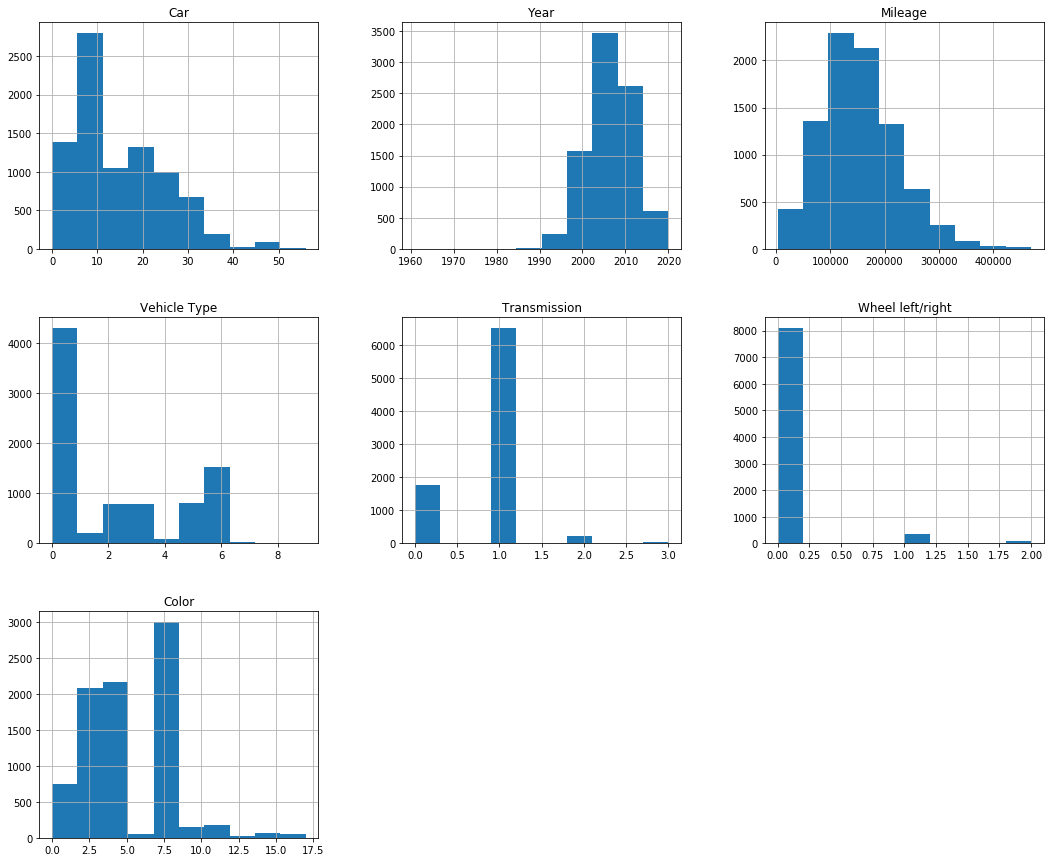

In [30]:
data1.drop("Price ($)",axis = 1).hist(figsize = (18,15))
plt.show()

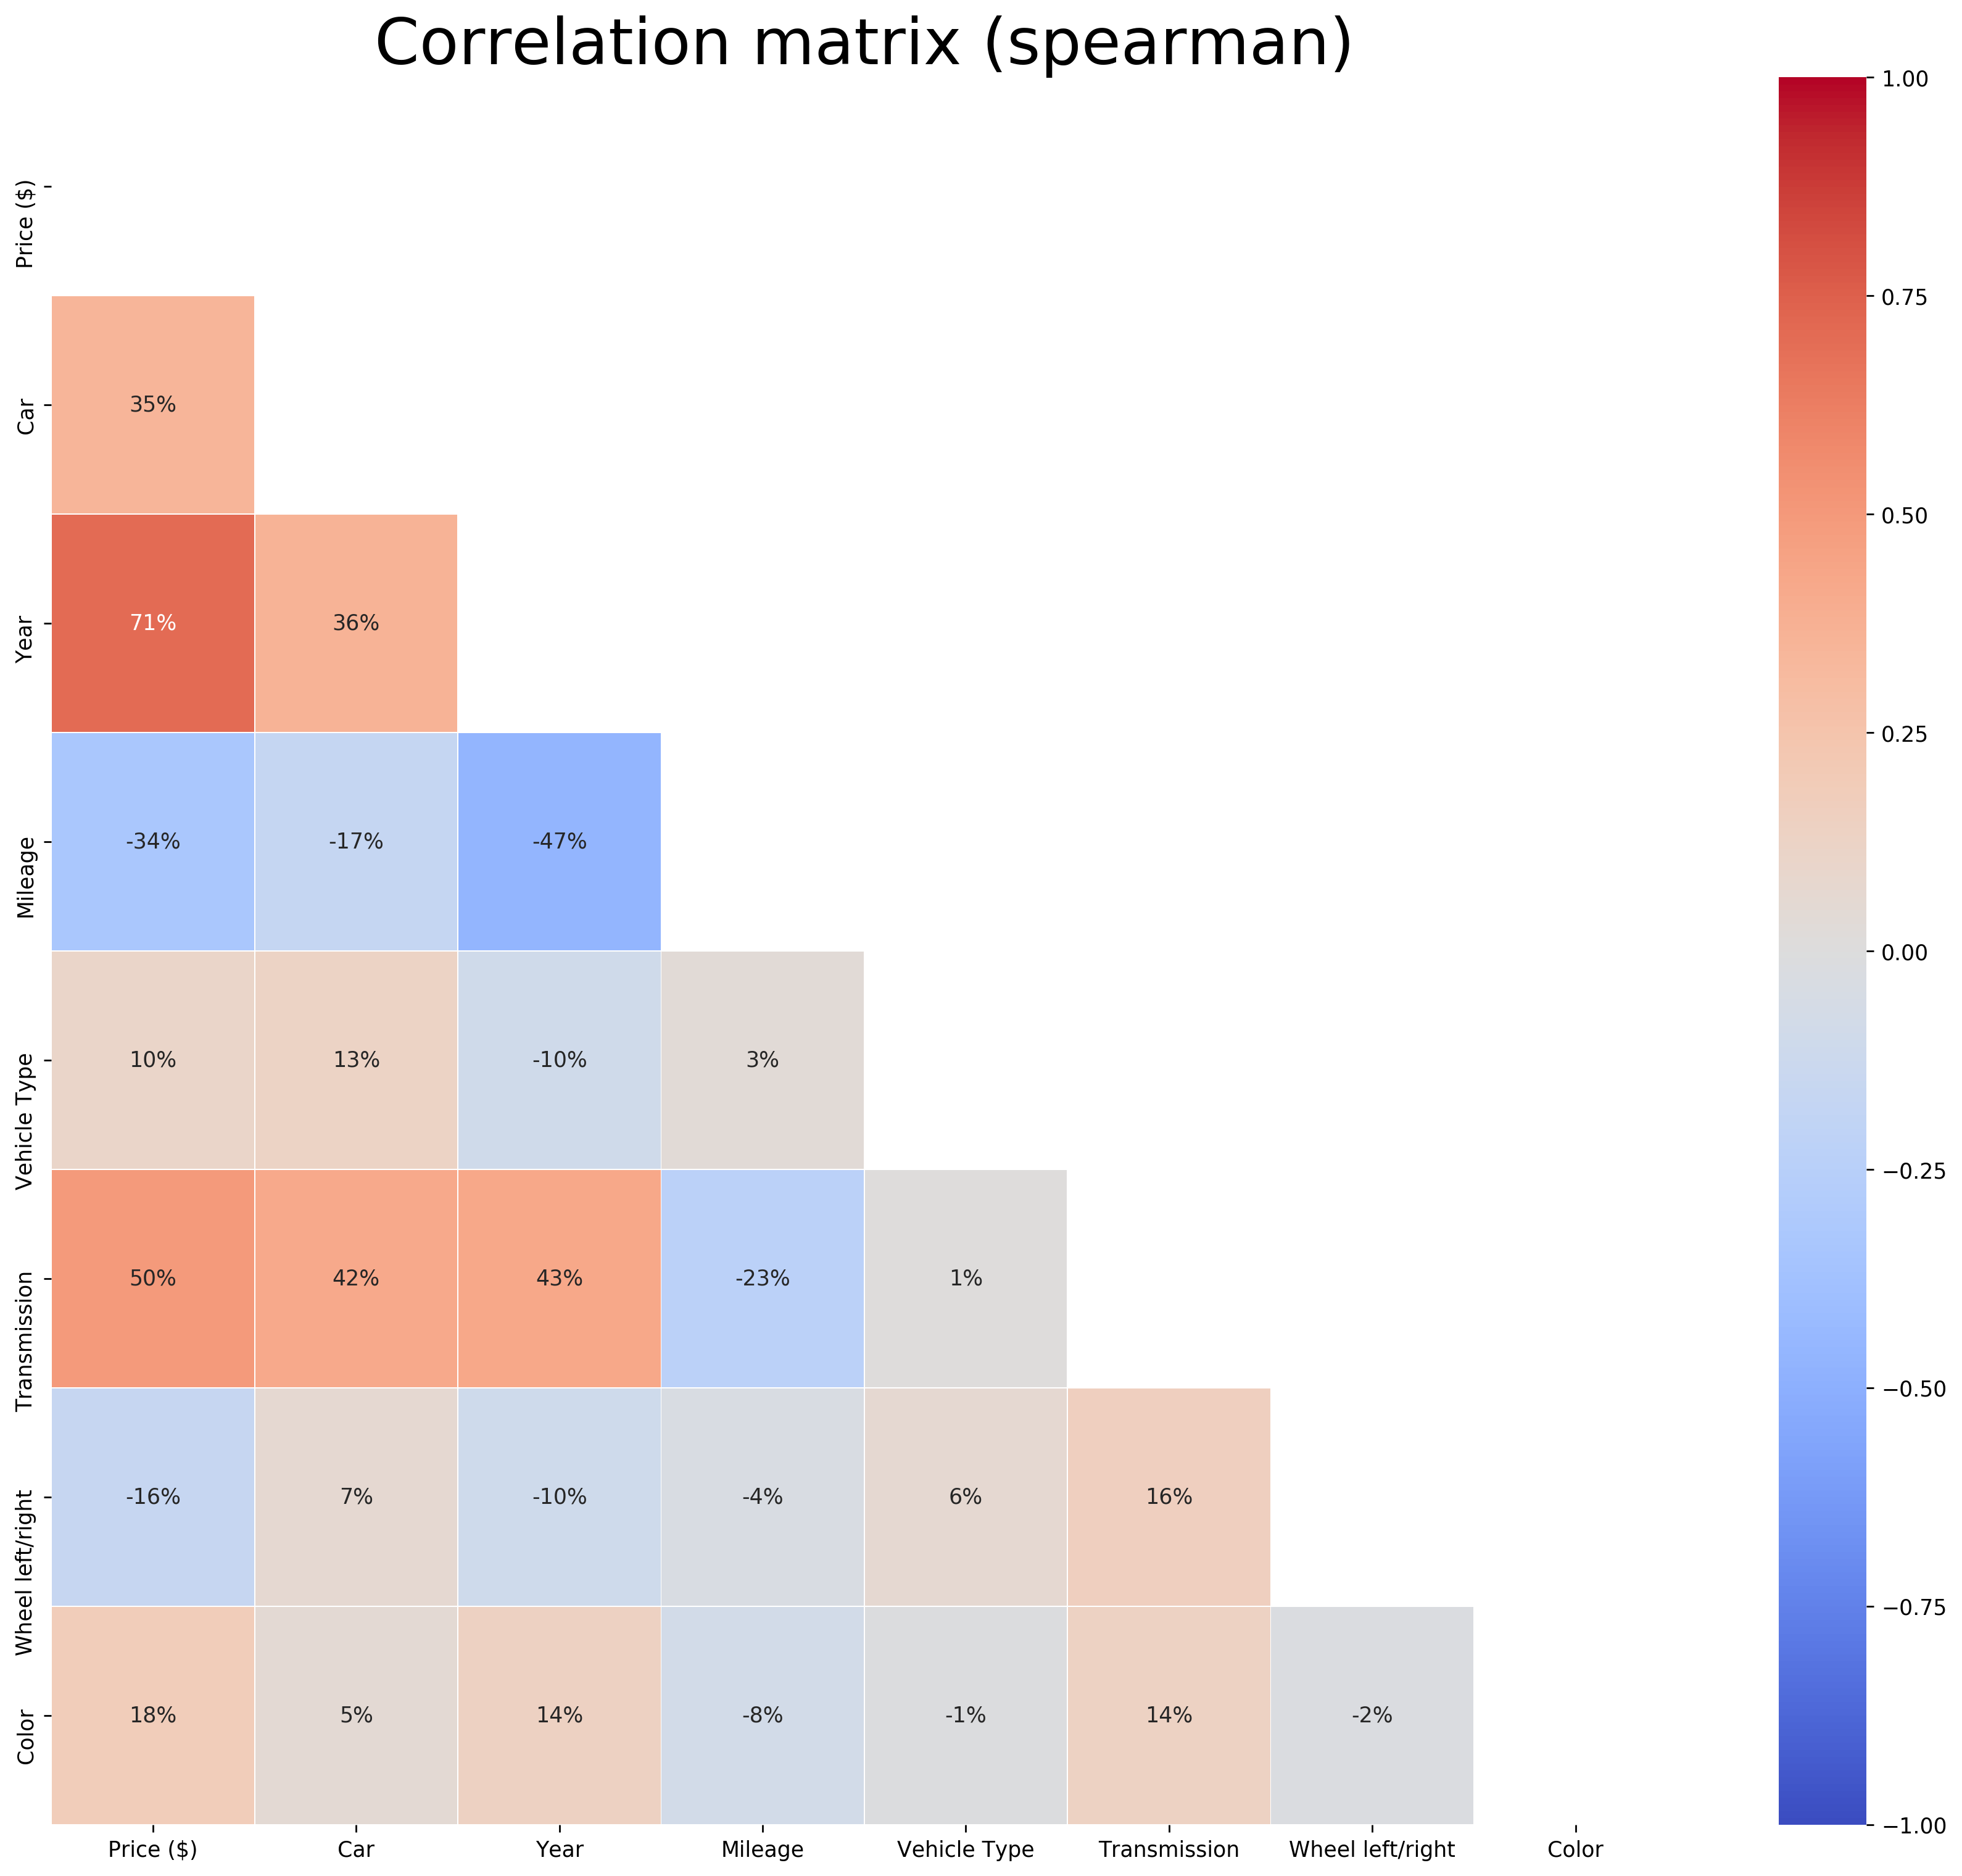

In [31]:
matrix = np.triu(data1.corr(method='spearman'))
f,ax=plt.subplots(figsize = (17,15),dpi=250)
sns.heatmap(data1.corr(method='spearman'),annot= True,fmt = ".0%",ax=ax,
            vmin = -1,
            vmax = 1, mask = matrix,cmap = "coolwarm",
            linewidth = 0.2,linecolor = "white")
plt.title('Correlation matrix (spearman)', size = 30)
plt.show()

# 2 . Modeling


In [233]:
#Split data
from sklearn.model_selection import train_test_split
X_train , X_test, y_train,y_test = train_test_split(data1[data1.columns.difference(["Price ($)"])],data1["Price ($)"],test_size =0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6836, 7)
(6836,)
(1709, 7)
(1709,)


In [234]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [235]:
#Linear Regression
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score,confusion_matrix
lreg = linear_model.LinearRegression()
lreg.fit(X_train,y_train)
y_pred_lreg = lreg.predict(X_test)
#Evaluation
print("MAE",mean_absolute_error(y_test,y_pred_lreg))
print("MSE",mean_squared_error(y_test,y_pred_lreg))
print("R-squared",r2_score(y_test,y_pred_lreg))
print("SMSE",np.sqrt(mean_squared_error(y_test,y_pred_lreg)))

MAE 4131.3606039774795
MSE 64161923.83211545
R-squared 0.2660601545991207
SMSE 8010.113846389167


In [236]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(splitter = "best", max_depth = 5)
dt.fit(X_train,y_train)
y_pred_dt  = dt.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred_dt))
print("MSE",mean_squared_error(y_test,y_pred_dt))
print("R-squared",r2_score(y_test,y_pred_dt))
print("SMSE",np.sqrt(mean_squared_error(y_test,y_pred_dt)))

MAE 3296.7990487725037
MSE 50502506.022013225
R-squared 0.4223084463748492
SMSE 7106.5115226820835


In [237]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=20, max_depth=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred_rf))
print("MSE",mean_squared_error(y_test,y_pred_rf))
print("R-squared",r2_score(y_test,y_pred_rf))
print("SMSE",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

MAE 3065.709535881235
MSE 46770249.3638731
R-squared 0.4650012415883972
SMSE 6838.877785417218


In [238]:
#Xgboost 
import xgboost as xgb
xgbmodel = xgb.XGBRegressor(n_estimators=15, 
                             eta=0.2, gamma=1, max_depth=10, 
                             reg_lambda=1)
xgbmodel.fit(X_train, y_train)
y_pred_xg = xgbmodel.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred_xg))
print("MSE",mean_squared_error(y_test,y_pred_xg))
print("R-squared",r2_score(y_test,y_pred_xg))
print("SMSE",np.sqrt(mean_squared_error(y_test,y_pred_xg)))

MAE 2212.4411686807434
MSE 36853320.22362481
R-squared 0.5784396955083555
SMSE 6070.693553756837


### From evolutions of models we can see that xgboost is much better from others

In [ ]:
#now we try use xgboost with Grid Search

In [239]:
from sklearn.model_selection import GridSearchCV

In [240]:
xgbb = xgb.XGBRegressor()

param_grid = {
    "booster": ['gbtree', 'dart'],
    "eta": [0.01, 0.06, 0.1, 0.7],
    "gamma": [0, 0.5, 1],
    "max_depth": [5, 8, 10, 13, 15],
    "lambda": [0, 1, 2],
    "alpha": [0, 1, 2]
}

xgb_model = GridSearchCV(estimator=xgbb, cv=5, param_grid=param_grid, verbose=2)
xgb_model.fit(X_train, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=8, total=   0.5s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=8, total=   0.5s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma

[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=2, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=2, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=2, max_depth=8, total=   0.5s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=2, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=2, max_depth=8, total=   0.5s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=2, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=2, max_depth=8, total=   0.5s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=2, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=2, max_depth=8, total=   0.5s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0, lambda=2, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma

[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=5, total=   0.3s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=8, total=   0.5s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=8, total=   0.5s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=8, total=   0.6s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=8, total=   0.5s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=8, total=   0.5s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=10 
[CV]  alpha=0, booste

[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=8, total=   0.6s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=8, total=   0.5s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=8, total=   0.5s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=8, total=   0.6s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=8, total=   0.6s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=10, total=   1.0s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.01, ga

[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=8, total=   0.5s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=8, total=   0.5s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=8, total=   0.5s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=10, total=   0.7s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=10, total=   0.7s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=10, total=   0.7s
[CV] alpha=0, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.01

[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=8, total=   0.5s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=10, total=   0.7s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=10, total=   0.7s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=10, total=   0.7s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=10, total=   0.7s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=10, total=   0.7s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=13 
[CV]  alpha=0, booster=gbtree, eta=

[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=10, total=   0.9s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=10, total=   0.9s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=10, total=   0.9s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=10, total=   0.9s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=10, total=   0.9s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=13 
[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=13, total=   2.1s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=13 
[CV]  alph

[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=10, total=   0.7s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=10, total=   0.7s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=10, total=   0.7s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=10, total=   0.7s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=10, total=   0.7s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=13 
[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=13, total=   1.3s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=13 
[CV]  alph

[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=10, total=   0.7s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=10, total=   0.7s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=10, total=   0.7s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=10, total=   0.7s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=13 
[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=13, total=   1.3s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=13 
[CV]  alpha=0, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=13, total=   1.3s
[CV] alpha=0, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=13 
[CV]  alpha=0, booster=gbtree, eta

[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=10, total=   0.8s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=10 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=10, total=   0.8s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=13 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=13, total=   1.7s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=13 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=13, total=   1.8s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=13 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=13, total=   1.7s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=13 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=13, total=   1.7s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=13 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=

[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=13, total=   1.1s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=13 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=13, total=   1.1s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=13 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=13, total=   1.1s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=13 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=13, total=   1.1s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=13 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=13, total=   1.1s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=15 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=15, total=   1.5s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=15 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=

[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=13, total=   1.3s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=13 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=13, total=   1.3s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=13 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=13, total=   1.2s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=13 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=13, total=   1.2s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=15 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=15, total=   1.7s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=15 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=15, total=   1.7s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=15 
[CV]  alpha=0, booster

[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=13, total=   1.8s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=13 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=13, total=   1.8s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=13 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=13, total=   1.8s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=15 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=15, total=   2.8s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=15 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=15, total=   3.0s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=15 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=15, total=   2.7s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=15 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=

[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=13, total=   1.1s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=15 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=15, total=   1.6s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=15 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=15, total=   1.6s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=15 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=15, total=   1.7s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=15 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=15, total=   1.5s
[CV] alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=15 
[CV]  alpha=0, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=15, total=   1.5s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=0, lambda=0, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=0

[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=0, lambda=1, max_depth=15, total=   1.6s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=0, lambda=1, max_depth=15 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=0, lambda=1, max_depth=15, total=   1.6s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=0, lambda=1, max_depth=15 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=0, lambda=1, max_depth=15, total=   1.6s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=0, lambda=1, max_depth=15 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=0, lambda=1, max_depth=15, total=   1.7s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=0, lambda=2, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=0, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=0, lambda=2, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=0, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=0, lambda=2, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=0, la

[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=0.5, lambda=0, max_depth=15, total=   1.0s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=0.5, lambda=0, max_depth=15 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=0.5, lambda=0, max_depth=15, total=   1.0s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=0.5, lambda=1, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=0.5, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=0.5, lambda=1, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=0.5, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=0.5, lambda=1, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=0.5, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=0.5, lambda=1, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=0.5, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=0.5, lambda=1, max_depth=5 
[CV]  alpha=0, booster=gbtree, 

[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=0.5, lambda=2, max_depth=15, total=   1.4s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=0, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=0, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=0, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=0, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=0, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=0, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda

[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=2, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=2, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=2, max_depth=5 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=2, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=2, max_depth=8, total=   0.4s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=2, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=2, max_depth=8, total=   0.4s
[CV] alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=2, max_depth=8 
[CV]  alpha=0, booster=gbtree, eta=0.7, gamma=1, lambda=2,

[CV]  alpha=0, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=5, total=   0.4s
[CV] alpha=0, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=8 .
[CV]  alpha=0, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=8, total=   0.7s
[CV] alpha=0, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=8 .
[CV]  alpha=0, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=8, total=   0.8s
[CV] alpha=0, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=8 .
[CV]  alpha=0, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=8, total=   0.8s
[CV] alpha=0, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=8 .
[CV]  alpha=0, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=8, total=   0.8s
[CV] alpha=0, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=8 .
[CV]  alpha=0, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=8, total=   0.7s
[CV] alpha=0, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=10 
[CV]  alpha=0, booster=dart, eta=0.01, gamma=0, lambda=1, max_de

[CV]  alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=8, total=   0.8s
[CV] alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=8 
[CV]  alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=8, total=   0.8s
[CV] alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=8 
[CV]  alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=8, total=   0.9s
[CV] alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=10 
[CV]  alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=10, total=   1.4s
[CV] alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=10 
[CV]  alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=10, total=   1.4s
[CV] alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=10 
[CV]  alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=10, total=   1.3s
[CV] alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=10 
[CV]  alpha=0, booster=dart, eta=0.01, 

[CV]  alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=8, total=   0.7s
[CV] alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=10 
[CV]  alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=10, total=   0.9s
[CV] alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=10 
[CV]  alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=10, total=   1.0s
[CV] alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=10 
[CV]  alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=10, total=   1.0s
[CV] alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=10 
[CV]  alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=10, total=   1.0s
[CV] alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=10 
[CV]  alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=10, total=   0.9s
[CV] alpha=0, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=13 
[CV]  alpha=0, booster=dart, eta=0.

[CV]  alpha=0, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=10, total=   1.3s
[CV] alpha=0, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=10 
[CV]  alpha=0, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=10, total=   1.1s
[CV] alpha=0, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=10 
[CV]  alpha=0, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=10, total=   1.4s
[CV] alpha=0, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=10 
[CV]  alpha=0, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=10, total=   1.2s
[CV] alpha=0, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=13 
[CV]  alpha=0, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=13, total=   1.4s
[CV] alpha=0, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=13 
[CV]  alpha=0, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=13, total=   1.4s
[CV] alpha=0, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=13 
[CV]  alpha=0, booster=dart, eta=0.01, gamma=1, lambda=1, 

[CV]  alpha=0, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=10, total=   1.5s
[CV] alpha=0, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=13 
[CV]  alpha=0, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=13, total=   3.0s
[CV] alpha=0, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=13 
[CV]  alpha=0, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=13, total=   3.2s
[CV] alpha=0, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=13 
[CV]  alpha=0, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=13, total=   2.9s
[CV] alpha=0, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=13 
[CV]  alpha=0, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=13, total=   3.3s
[CV] alpha=0, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=13 
[CV]  alpha=0, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=13, total=   3.1s
[CV] alpha=0, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=15 
[CV]  alpha=0, booster=dart, eta=0.06, gamma=0, lambda=0, 

[CV]  alpha=0, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=13, total=   1.8s
[CV] alpha=0, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=13 
[CV]  alpha=0, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=13, total=   2.1s
[CV] alpha=0, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=13 
[CV]  alpha=0, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=13, total=   2.0s
[CV] alpha=0, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=15 
[CV]  alpha=0, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=15, total=   2.4s
[CV] alpha=0, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=15 
[CV]  alpha=0, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=15, total=   2.4s
[CV] alpha=0, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=15 
[CV]  alpha=0, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=15, total=   2.4s
[CV] alpha=0, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=15 
[CV]  alpha=0, booster=dart, eta=0.06, gamma=0, lambda=2, 

[CV]  alpha=0, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=13, total=   2.0s
[CV] alpha=0, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=15 
[CV]  alpha=0, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=15, total=   2.5s
[CV] alpha=0, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=15 
[CV]  alpha=0, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=15, total=   2.6s
[CV] alpha=0, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=15 
[CV]  alpha=0, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=15, total=   2.6s
[CV] alpha=0, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=15 
[CV]  alpha=0, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=15, total=   2.5s
[CV] alpha=0, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=15 
[CV]  alpha=0, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=15, total=   2.4s
[CV] alpha=0, booster=dart, eta=0.06, gamma=0.5, lambda=2, max_depth=5 
[CV]  alpha=0, booster=dart, eta=0.

[CV]  alpha=0, booster=dart, eta=0.06, gamma=1, lambda=0, max_depth=15, total=   4.2s
[CV] alpha=0, booster=dart, eta=0.06, gamma=1, lambda=0, max_depth=15 
[CV]  alpha=0, booster=dart, eta=0.06, gamma=1, lambda=0, max_depth=15, total=   4.2s
[CV] alpha=0, booster=dart, eta=0.06, gamma=1, lambda=0, max_depth=15 
[CV]  alpha=0, booster=dart, eta=0.06, gamma=1, lambda=0, max_depth=15, total=   4.1s
[CV] alpha=0, booster=dart, eta=0.06, gamma=1, lambda=0, max_depth=15 
[CV]  alpha=0, booster=dart, eta=0.06, gamma=1, lambda=0, max_depth=15, total=   4.0s
[CV] alpha=0, booster=dart, eta=0.06, gamma=1, lambda=1, max_depth=5 .
[CV]  alpha=0, booster=dart, eta=0.06, gamma=1, lambda=1, max_depth=5, total=   0.4s
[CV] alpha=0, booster=dart, eta=0.06, gamma=1, lambda=1, max_depth=5 .
[CV]  alpha=0, booster=dart, eta=0.06, gamma=1, lambda=1, max_depth=5, total=   0.4s
[CV] alpha=0, booster=dart, eta=0.06, gamma=1, lambda=1, max_depth=5 .
[CV]  alpha=0, booster=dart, eta=0.06, gamma=1, lambda=1, ma

[CV]  alpha=0, booster=dart, eta=0.06, gamma=1, lambda=2, max_depth=15, total=   2.2s
[CV] alpha=0, booster=dart, eta=0.1, gamma=0, lambda=0, max_depth=5 ..
[CV]  alpha=0, booster=dart, eta=0.1, gamma=0, lambda=0, max_depth=5, total=   0.4s
[CV] alpha=0, booster=dart, eta=0.1, gamma=0, lambda=0, max_depth=5 ..
[CV]  alpha=0, booster=dart, eta=0.1, gamma=0, lambda=0, max_depth=5, total=   0.5s
[CV] alpha=0, booster=dart, eta=0.1, gamma=0, lambda=0, max_depth=5 ..
[CV]  alpha=0, booster=dart, eta=0.1, gamma=0, lambda=0, max_depth=5, total=   0.4s
[CV] alpha=0, booster=dart, eta=0.1, gamma=0, lambda=0, max_depth=5 ..
[CV]  alpha=0, booster=dart, eta=0.1, gamma=0, lambda=0, max_depth=5, total=   0.4s
[CV] alpha=0, booster=dart, eta=0.1, gamma=0, lambda=0, max_depth=5 ..
[CV]  alpha=0, booster=dart, eta=0.1, gamma=0, lambda=0, max_depth=5, total=   0.5s
[CV] alpha=0, booster=dart, eta=0.1, gamma=0, lambda=0, max_depth=8 ..
[CV]  alpha=0, booster=dart, eta=0.1, gamma=0, lambda=0, max_depth=8

[CV]  alpha=0, booster=dart, eta=0.1, gamma=0, lambda=2, max_depth=5, total=   0.4s
[CV] alpha=0, booster=dart, eta=0.1, gamma=0, lambda=2, max_depth=5 ..
[CV]  alpha=0, booster=dart, eta=0.1, gamma=0, lambda=2, max_depth=5, total=   0.4s
[CV] alpha=0, booster=dart, eta=0.1, gamma=0, lambda=2, max_depth=5 ..
[CV]  alpha=0, booster=dart, eta=0.1, gamma=0, lambda=2, max_depth=5, total=   0.4s
[CV] alpha=0, booster=dart, eta=0.1, gamma=0, lambda=2, max_depth=8 ..
[CV]  alpha=0, booster=dart, eta=0.1, gamma=0, lambda=2, max_depth=8, total=   0.8s
[CV] alpha=0, booster=dart, eta=0.1, gamma=0, lambda=2, max_depth=8 ..
[CV]  alpha=0, booster=dart, eta=0.1, gamma=0, lambda=2, max_depth=8, total=   0.8s
[CV] alpha=0, booster=dart, eta=0.1, gamma=0, lambda=2, max_depth=8 ..
[CV]  alpha=0, booster=dart, eta=0.1, gamma=0, lambda=2, max_depth=8, total=   0.8s
[CV] alpha=0, booster=dart, eta=0.1, gamma=0, lambda=2, max_depth=8 ..
[CV]  alpha=0, booster=dart, eta=0.1, gamma=0, lambda=2, max_depth=8, 

[CV]  alpha=0, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=8, total=   1.2s
[CV] alpha=0, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=8 
[CV]  alpha=0, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=8, total=   1.2s
[CV] alpha=0, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=8 
[CV]  alpha=0, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=8, total=   1.3s
[CV] alpha=0, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=8 
[CV]  alpha=0, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=8, total=   1.1s
[CV] alpha=0, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=8 
[CV]  alpha=0, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=8, total=   0.9s
[CV] alpha=0, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=10 
[CV]  alpha=0, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=10, total=   1.2s
[CV] alpha=0, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=10 
[CV]  alpha=0, booster=dart, eta=0.1, gamma=0.5, lambda

[CV]  alpha=0, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=8, total=   0.8s
[CV] alpha=0, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=8 ..
[CV]  alpha=0, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=8, total=   0.8s
[CV] alpha=0, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=8 ..
[CV]  alpha=0, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=8, total=   0.8s
[CV] alpha=0, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=10 .
[CV]  alpha=0, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=10, total=   1.2s
[CV] alpha=0, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=10 .
[CV]  alpha=0, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=10, total=   1.2s
[CV] alpha=0, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=10 .
[CV]  alpha=0, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=10, total=   1.2s
[CV] alpha=0, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=10 .
[CV]  alpha=0, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=

[CV]  alpha=0, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=10, total=   1.1s
[CV] alpha=0, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=10 .
[CV]  alpha=0, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=10, total=   1.1s
[CV] alpha=0, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=10 .
[CV]  alpha=0, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=10, total=   1.1s
[CV] alpha=0, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=10 .
[CV]  alpha=0, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=10, total=   1.1s
[CV] alpha=0, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=10 .
[CV]  alpha=0, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=10, total=   1.1s
[CV] alpha=0, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=13 .
[CV]  alpha=0, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=13, total=   1.8s
[CV] alpha=0, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=13 .
[CV]  alpha=0, booster=dart, eta=0.1, gamma=1, lambda=2, max_dep

[CV]  alpha=0, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=10, total=   1.1s
[CV] alpha=0, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=10 .
[CV]  alpha=0, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=10, total=   1.1s
[CV] alpha=0, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=13 .
[CV]  alpha=0, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=13, total=   1.8s
[CV] alpha=0, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=13 .
[CV]  alpha=0, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=13, total=   1.8s
[CV] alpha=0, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=13 .
[CV]  alpha=0, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=13, total=   1.8s
[CV] alpha=0, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=13 .
[CV]  alpha=0, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=13, total=   1.9s
[CV] alpha=0, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=13 .
[CV]  alpha=0, booster=dart, eta=0.7, gamma=0, lambda=1, max_dep

[CV]  alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=13, total=   1.5s
[CV] alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=13 
[CV]  alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=13, total=   1.6s
[CV] alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=13 
[CV]  alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=13, total=   1.3s
[CV] alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=13 
[CV]  alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=13, total=   1.5s
[CV] alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=15 
[CV]  alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=15, total=   1.6s
[CV] alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=15 
[CV]  alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=15, total=   1.5s
[CV] alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=15 
[CV]  alpha=0, booster=dart, eta=0.7, gamma=0.

[CV]  alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=13, total=   1.7s
[CV] alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=13 
[CV]  alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=13, total=   1.7s
[CV] alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=15 
[CV]  alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=15, total=   2.2s
[CV] alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=15 
[CV]  alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=15, total=   2.2s
[CV] alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=15 
[CV]  alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=15, total=   2.1s
[CV] alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=15 
[CV]  alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=15, total=   2.3s
[CV] alpha=0, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=15 
[CV]  alpha=0, booster=dart, eta=0.7, gamma=0.

[CV]  alpha=0, booster=dart, eta=0.7, gamma=1, lambda=1, max_depth=15, total=   2.0s
[CV] alpha=0, booster=dart, eta=0.7, gamma=1, lambda=1, max_depth=15 .
[CV]  alpha=0, booster=dart, eta=0.7, gamma=1, lambda=1, max_depth=15, total=   2.0s
[CV] alpha=0, booster=dart, eta=0.7, gamma=1, lambda=1, max_depth=15 .
[CV]  alpha=0, booster=dart, eta=0.7, gamma=1, lambda=1, max_depth=15, total=   2.0s
[CV] alpha=0, booster=dart, eta=0.7, gamma=1, lambda=1, max_depth=15 .
[CV]  alpha=0, booster=dart, eta=0.7, gamma=1, lambda=1, max_depth=15, total=   1.9s
[CV] alpha=0, booster=dart, eta=0.7, gamma=1, lambda=2, max_depth=5 ..
[CV]  alpha=0, booster=dart, eta=0.7, gamma=1, lambda=2, max_depth=5, total=   0.4s
[CV] alpha=0, booster=dart, eta=0.7, gamma=1, lambda=2, max_depth=5 ..
[CV]  alpha=0, booster=dart, eta=0.7, gamma=1, lambda=2, max_depth=5, total=   0.4s
[CV] alpha=0, booster=dart, eta=0.7, gamma=1, lambda=2, max_depth=5 ..
[CV]  alpha=0, booster=dart, eta=0.7, gamma=1, lambda=2, max_depth

[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=15, total=   3.0s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=15 
[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=15, total=   3.2s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=0, lambda=1, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=0, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=0, lambda=1, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=0, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=0, lambda=1, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=0, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=0, lambda=1, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=0, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=0, lambda=1, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.01, ga

[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=0, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=0, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=0, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=0, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=0, max_depth=8 
[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=0, max_depth=8, total=   0.5s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=0, max_depth=8 
[CV]  alpha=1, booster

[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=2, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=2, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=2, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=2, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=2, max_depth=8 
[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=2, max_depth=8, total=   0.5s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=0.5, lambda=2, max_depth=8 
[CV]  alpha=1, booster

[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=1, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=1, lambda=1, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=1, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=1, lambda=1, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=1, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=1, lambda=1, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=1, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=1, lambda=1, max_depth=8 
[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=1, lambda=1, max_depth=8, total=   0.5s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=1, lambda=1, max_depth=8 
[CV]  alpha=1, booster=gbtree, eta=0.01, gamma=1, lambda=1, max_depth=8, total=   0.5s
[CV] alpha=1, booster=gbtree, eta=0.01, gamma=1, lambda=1, max_depth=8 
[CV]  alpha=1, booster=gbtree, eta=0.01, gamma

[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=0, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=0, max_depth=8 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=0, max_depth=8, total=   0.5s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=0, max_depth=8 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=0, max_depth=8, total=   0.5s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=0, max_depth=8 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=0, max_depth=8, total=   0.5s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=0, max_depth=8 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=0, max_depth=8, total=   0.5s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=0, max_depth=8 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma

[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=2, max_depth=8, total=   0.4s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=2, max_depth=8 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=2, max_depth=8, total=   0.4s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=2, max_depth=8 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=2, max_depth=8, total=   0.4s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=2, max_depth=8 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=2, max_depth=8, total=   0.4s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=2, max_depth=8 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=2, max_depth=8, total=   0.4s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=2, max_depth=10 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=2, max_depth=10, total=   0.7s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=0, lambda=2, max_depth=10 
[CV]  alpha=1, booster=gbtree, eta=0.06, ga

[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=0.5, lambda=1, max_depth=8, total=   0.5s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=0.5, lambda=1, max_depth=8 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=0.5, lambda=1, max_depth=8, total=   0.5s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=0.5, lambda=1, max_depth=8 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=0.5, lambda=1, max_depth=8, total=   0.5s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=0.5, lambda=1, max_depth=8 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=0.5, lambda=1, max_depth=8, total=   0.4s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=0.5, lambda=1, max_depth=10 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=0.5, lambda=1, max_depth=10, total=   0.7s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=0.5, lambda=1, max_depth=10 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=0.5, lambda=1, max_depth=10, total=   0.8s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=0.5, lambda=1, max_depth=10 
[CV]  alpha=1, bo

[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=0, max_depth=8, total=   0.5s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=0, max_depth=8 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=0, max_depth=8, total=   0.5s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=0, max_depth=8 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=0, max_depth=8, total=   0.5s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=0, max_depth=10 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=0, max_depth=10, total=   0.9s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=0, max_depth=10 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=0, max_depth=10, total=   0.9s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=0, max_depth=10 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=0, max_depth=10, total=   0.9s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=0, max_depth=10 
[CV]  alpha=1, booster=gbtree, eta=0.06

[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=2, max_depth=8, total=   0.4s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=2, max_depth=10 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=2, max_depth=10, total=   0.7s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=2, max_depth=10 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=2, max_depth=10, total=   0.7s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=2, max_depth=10 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=2, max_depth=10, total=   0.7s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=2, max_depth=10 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=2, max_depth=10, total=   0.7s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=2, max_depth=10 
[CV]  alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=2, max_depth=10, total=   0.7s
[CV] alpha=1, booster=gbtree, eta=0.06, gamma=1, lambda=2, max_depth=13 
[CV]  alpha=1, booster=gbtree, eta=

[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=0, lambda=1, max_depth=10, total=   0.7s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=0, lambda=1, max_depth=10 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=0, lambda=1, max_depth=10, total=   0.7s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=0, lambda=1, max_depth=10 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=0, lambda=1, max_depth=10, total=   0.7s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=0, lambda=1, max_depth=10 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=0, lambda=1, max_depth=10, total=   0.7s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=0, lambda=1, max_depth=13 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=0, lambda=1, max_depth=13, total=   1.2s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=0, lambda=1, max_depth=13 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=0, lambda=1, max_depth=13, total=   1.2s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=0, lambda=1, max_depth=13 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=

[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=0, max_depth=10, total=   0.8s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=0, max_depth=10 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=0, max_depth=10, total=   0.8s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=0, max_depth=13 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=0, max_depth=13, total=   1.7s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=0, max_depth=13 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=0, max_depth=13, total=   1.7s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=0, max_depth=13 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=0, max_depth=13, total=   1.6s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=0, max_depth=13 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=0, max_depth=13, total=   1.7s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=0, max_depth=13 
[CV]  alpha=1, booster

[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=2, max_depth=10, total=   0.7s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=2, max_depth=13 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=2, max_depth=13, total=   1.1s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=2, max_depth=13 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=2, max_depth=13, total=   1.1s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=2, max_depth=13 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=2, max_depth=13, total=   1.2s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=2, max_depth=13 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=2, max_depth=13, total=   1.1s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=2, max_depth=13 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=2, max_depth=13, total=   1.1s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=0.5, lambda=2, max_depth=15 
[CV]  alpha=1, booster

[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=1, lambda=1, max_depth=13, total=   1.2s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=1, lambda=1, max_depth=13 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=1, lambda=1, max_depth=13, total=   1.2s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=1, lambda=1, max_depth=13 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=1, lambda=1, max_depth=13, total=   1.1s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=1, lambda=1, max_depth=13 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=1, lambda=1, max_depth=13, total=   1.2s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=1, lambda=1, max_depth=15 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=1, lambda=1, max_depth=15, total=   1.7s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=1, lambda=1, max_depth=15 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=1, lambda=1, max_depth=15, total=   1.8s
[CV] alpha=1, booster=gbtree, eta=0.1, gamma=1, lambda=1, max_depth=15 
[CV]  alpha=1, booster=gbtree, eta=0.1, gamma=

[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=0, lambda=0, max_depth=13, total=   1.0s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=0, lambda=0, max_depth=13 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=0, lambda=0, max_depth=13, total=   1.0s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=0, lambda=0, max_depth=15 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=0, lambda=0, max_depth=15, total=   1.1s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=0, lambda=0, max_depth=15 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=0, lambda=0, max_depth=15, total=   1.1s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=0, lambda=0, max_depth=15 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=0, lambda=0, max_depth=15, total=   1.1s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=0, lambda=0, max_depth=15 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=0, lambda=0, max_depth=15, total=   1.1s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=0, lambda=0, max_depth=15 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=

[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=0, lambda=2, max_depth=15, total=   1.4s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=0, lambda=2, max_depth=15 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=0, lambda=2, max_depth=15, total=   1.5s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=0, lambda=2, max_depth=15 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=0, lambda=2, max_depth=15, total=   1.4s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=0, lambda=2, max_depth=15 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=0, lambda=2, max_depth=15, total=   1.4s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=0, lambda=2, max_depth=15 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=0, lambda=2, max_depth=15, total=   1.5s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=0.5, lambda=0, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=0.5, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=0.5, lambda=0, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.7, gam

[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=0.5, lambda=1, max_depth=15, total=   1.4s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=0.5, lambda=1, max_depth=15 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=0.5, lambda=1, max_depth=15, total=   1.4s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=0.5, lambda=1, max_depth=15 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=0.5, lambda=1, max_depth=15, total=   1.3s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=0.5, lambda=1, max_depth=15 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=0.5, lambda=1, max_depth=15, total=   1.3s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=0.5, lambda=2, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=0.5, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=0.5, lambda=2, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=0.5, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=0.5, lambda=2, max_depth=5 
[CV]  alpha=1, booster=gbtr

[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=1, lambda=0, max_depth=15, total=   1.2s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=1, lambda=0, max_depth=15 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=1, lambda=0, max_depth=15, total=   1.1s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=1, lambda=1, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=1, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=1, lambda=1, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=1, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=1, lambda=1, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=1, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=1, lambda=1, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=1, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=1, booster=gbtree, eta=0.7, gamma=1, lambda=1, max_depth=5 
[CV]  alpha=1, booster=gbtree, eta=0.7, gamma=1, lambda

[CV]  alpha=1, booster=dart, eta=0.01, gamma=0, lambda=0, max_depth=5, total=   0.4s
[CV] alpha=1, booster=dart, eta=0.01, gamma=0, lambda=0, max_depth=5 .
[CV]  alpha=1, booster=dart, eta=0.01, gamma=0, lambda=0, max_depth=5, total=   0.4s
[CV] alpha=1, booster=dart, eta=0.01, gamma=0, lambda=0, max_depth=5 .
[CV]  alpha=1, booster=dart, eta=0.01, gamma=0, lambda=0, max_depth=5, total=   0.4s
[CV] alpha=1, booster=dart, eta=0.01, gamma=0, lambda=0, max_depth=5 .
[CV]  alpha=1, booster=dart, eta=0.01, gamma=0, lambda=0, max_depth=5, total=   0.4s
[CV] alpha=1, booster=dart, eta=0.01, gamma=0, lambda=0, max_depth=5 .
[CV]  alpha=1, booster=dart, eta=0.01, gamma=0, lambda=0, max_depth=5, total=   0.4s
[CV] alpha=1, booster=dart, eta=0.01, gamma=0, lambda=0, max_depth=8 .
[CV]  alpha=1, booster=dart, eta=0.01, gamma=0, lambda=0, max_depth=8, total=   0.8s
[CV] alpha=1, booster=dart, eta=0.01, gamma=0, lambda=0, max_depth=8 .
[CV]  alpha=1, booster=dart, eta=0.01, gamma=0, lambda=0, max_de

[CV]  alpha=1, booster=dart, eta=0.01, gamma=0, lambda=2, max_depth=5, total=   0.4s
[CV] alpha=1, booster=dart, eta=0.01, gamma=0, lambda=2, max_depth=5 .
[CV]  alpha=1, booster=dart, eta=0.01, gamma=0, lambda=2, max_depth=5, total=   0.4s
[CV] alpha=1, booster=dart, eta=0.01, gamma=0, lambda=2, max_depth=8 .
[CV]  alpha=1, booster=dart, eta=0.01, gamma=0, lambda=2, max_depth=8, total=   0.7s
[CV] alpha=1, booster=dart, eta=0.01, gamma=0, lambda=2, max_depth=8 .
[CV]  alpha=1, booster=dart, eta=0.01, gamma=0, lambda=2, max_depth=8, total=   0.7s
[CV] alpha=1, booster=dart, eta=0.01, gamma=0, lambda=2, max_depth=8 .
[CV]  alpha=1, booster=dart, eta=0.01, gamma=0, lambda=2, max_depth=8, total=   0.7s
[CV] alpha=1, booster=dart, eta=0.01, gamma=0, lambda=2, max_depth=8 .
[CV]  alpha=1, booster=dart, eta=0.01, gamma=0, lambda=2, max_depth=8, total=   0.7s
[CV] alpha=1, booster=dart, eta=0.01, gamma=0, lambda=2, max_depth=8 .
[CV]  alpha=1, booster=dart, eta=0.01, gamma=0, lambda=2, max_de

[CV]  alpha=1, booster=dart, eta=0.01, gamma=0.5, lambda=1, max_depth=8, total=   0.8s
[CV] alpha=1, booster=dart, eta=0.01, gamma=0.5, lambda=1, max_depth=8 
[CV]  alpha=1, booster=dart, eta=0.01, gamma=0.5, lambda=1, max_depth=8, total=   0.8s
[CV] alpha=1, booster=dart, eta=0.01, gamma=0.5, lambda=1, max_depth=8 
[CV]  alpha=1, booster=dart, eta=0.01, gamma=0.5, lambda=1, max_depth=8, total=   0.8s
[CV] alpha=1, booster=dart, eta=0.01, gamma=0.5, lambda=1, max_depth=8 
[CV]  alpha=1, booster=dart, eta=0.01, gamma=0.5, lambda=1, max_depth=8, total=   0.7s
[CV] alpha=1, booster=dart, eta=0.01, gamma=0.5, lambda=1, max_depth=8 
[CV]  alpha=1, booster=dart, eta=0.01, gamma=0.5, lambda=1, max_depth=8, total=   0.7s
[CV] alpha=1, booster=dart, eta=0.01, gamma=0.5, lambda=1, max_depth=10 
[CV]  alpha=1, booster=dart, eta=0.01, gamma=0.5, lambda=1, max_depth=10, total=   1.0s
[CV] alpha=1, booster=dart, eta=0.01, gamma=0.5, lambda=1, max_depth=10 
[CV]  alpha=1, booster=dart, eta=0.01, gamm

[CV]  alpha=1, booster=dart, eta=0.01, gamma=1, lambda=0, max_depth=8, total=   0.9s
[CV] alpha=1, booster=dart, eta=0.01, gamma=1, lambda=0, max_depth=8 .
[CV]  alpha=1, booster=dart, eta=0.01, gamma=1, lambda=0, max_depth=8, total=   0.9s
[CV] alpha=1, booster=dart, eta=0.01, gamma=1, lambda=0, max_depth=8 .
[CV]  alpha=1, booster=dart, eta=0.01, gamma=1, lambda=0, max_depth=8, total=   0.8s
[CV] alpha=1, booster=dart, eta=0.01, gamma=1, lambda=0, max_depth=10 
[CV]  alpha=1, booster=dart, eta=0.01, gamma=1, lambda=0, max_depth=10, total=   1.5s
[CV] alpha=1, booster=dart, eta=0.01, gamma=1, lambda=0, max_depth=10 
[CV]  alpha=1, booster=dart, eta=0.01, gamma=1, lambda=0, max_depth=10, total=   1.5s
[CV] alpha=1, booster=dart, eta=0.01, gamma=1, lambda=0, max_depth=10 
[CV]  alpha=1, booster=dart, eta=0.01, gamma=1, lambda=0, max_depth=10, total=   1.4s
[CV] alpha=1, booster=dart, eta=0.01, gamma=1, lambda=0, max_depth=10 
[CV]  alpha=1, booster=dart, eta=0.01, gamma=1, lambda=0, max

[CV]  alpha=1, booster=dart, eta=0.01, gamma=1, lambda=2, max_depth=10, total=   0.9s
[CV] alpha=1, booster=dart, eta=0.01, gamma=1, lambda=2, max_depth=10 
[CV]  alpha=1, booster=dart, eta=0.01, gamma=1, lambda=2, max_depth=10, total=   0.9s
[CV] alpha=1, booster=dart, eta=0.01, gamma=1, lambda=2, max_depth=10 
[CV]  alpha=1, booster=dart, eta=0.01, gamma=1, lambda=2, max_depth=10, total=   0.9s
[CV] alpha=1, booster=dart, eta=0.01, gamma=1, lambda=2, max_depth=10 
[CV]  alpha=1, booster=dart, eta=0.01, gamma=1, lambda=2, max_depth=10, total=   0.9s
[CV] alpha=1, booster=dart, eta=0.01, gamma=1, lambda=2, max_depth=10 
[CV]  alpha=1, booster=dart, eta=0.01, gamma=1, lambda=2, max_depth=10, total=   0.9s
[CV] alpha=1, booster=dart, eta=0.01, gamma=1, lambda=2, max_depth=13 
[CV]  alpha=1, booster=dart, eta=0.01, gamma=1, lambda=2, max_depth=13, total=   1.0s
[CV] alpha=1, booster=dart, eta=0.01, gamma=1, lambda=2, max_depth=13 
[CV]  alpha=1, booster=dart, eta=0.01, gamma=1, lambda=2, 

[CV]  alpha=1, booster=dart, eta=0.06, gamma=0, lambda=1, max_depth=10, total=   1.1s
[CV] alpha=1, booster=dart, eta=0.06, gamma=0, lambda=1, max_depth=10 
[CV]  alpha=1, booster=dart, eta=0.06, gamma=0, lambda=1, max_depth=10, total=   1.2s
[CV] alpha=1, booster=dart, eta=0.06, gamma=0, lambda=1, max_depth=13 
[CV]  alpha=1, booster=dart, eta=0.06, gamma=0, lambda=1, max_depth=13, total=   1.8s
[CV] alpha=1, booster=dart, eta=0.06, gamma=0, lambda=1, max_depth=13 
[CV]  alpha=1, booster=dart, eta=0.06, gamma=0, lambda=1, max_depth=13, total=   1.9s
[CV] alpha=1, booster=dart, eta=0.06, gamma=0, lambda=1, max_depth=13 
[CV]  alpha=1, booster=dart, eta=0.06, gamma=0, lambda=1, max_depth=13, total=   1.9s
[CV] alpha=1, booster=dart, eta=0.06, gamma=0, lambda=1, max_depth=13 
[CV]  alpha=1, booster=dart, eta=0.06, gamma=0, lambda=1, max_depth=13, total=   1.8s
[CV] alpha=1, booster=dart, eta=0.06, gamma=0, lambda=1, max_depth=13 
[CV]  alpha=1, booster=dart, eta=0.06, gamma=0, lambda=1, 

[CV]  alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=0, max_depth=13, total=   2.7s
[CV] alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=0, max_depth=13 
[CV]  alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=0, max_depth=13, total=   2.7s
[CV] alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=0, max_depth=13 
[CV]  alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=0, max_depth=13, total=   2.6s
[CV] alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=0, max_depth=13 
[CV]  alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=0, max_depth=13, total=   2.6s
[CV] alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=0, max_depth=13 
[CV]  alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=0, max_depth=13, total=   2.6s
[CV] alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=0, max_depth=15 
[CV]  alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=0, max_depth=15, total=   3.6s
[CV] alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=0, max_depth=15 
[CV]  alpha=1, booster=dart, eta=0

[CV]  alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=2, max_depth=13, total=   1.8s
[CV] alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=2, max_depth=13 
[CV]  alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=2, max_depth=13, total=   1.8s
[CV] alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=2, max_depth=13 
[CV]  alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=2, max_depth=13, total=   1.8s
[CV] alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=2, max_depth=15 
[CV]  alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=2, max_depth=15, total=   2.3s
[CV] alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=2, max_depth=15 
[CV]  alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=2, max_depth=15, total=   2.2s
[CV] alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=2, max_depth=15 
[CV]  alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=2, max_depth=15, total=   2.3s
[CV] alpha=1, booster=dart, eta=0.06, gamma=0.5, lambda=2, max_depth=15 
[CV]  alpha=1, booster=dart, eta=0

[CV]  alpha=1, booster=dart, eta=0.06, gamma=1, lambda=1, max_depth=15, total=   2.3s
[CV] alpha=1, booster=dart, eta=0.06, gamma=1, lambda=1, max_depth=15 
[CV]  alpha=1, booster=dart, eta=0.06, gamma=1, lambda=1, max_depth=15, total=   2.3s
[CV] alpha=1, booster=dart, eta=0.06, gamma=1, lambda=1, max_depth=15 
[CV]  alpha=1, booster=dart, eta=0.06, gamma=1, lambda=1, max_depth=15, total=   2.3s
[CV] alpha=1, booster=dart, eta=0.06, gamma=1, lambda=1, max_depth=15 
[CV]  alpha=1, booster=dart, eta=0.06, gamma=1, lambda=1, max_depth=15, total=   2.2s
[CV] alpha=1, booster=dart, eta=0.06, gamma=1, lambda=1, max_depth=15 
[CV]  alpha=1, booster=dart, eta=0.06, gamma=1, lambda=1, max_depth=15, total=   2.3s
[CV] alpha=1, booster=dart, eta=0.06, gamma=1, lambda=2, max_depth=5 .
[CV]  alpha=1, booster=dart, eta=0.06, gamma=1, lambda=2, max_depth=5, total=   0.4s
[CV] alpha=1, booster=dart, eta=0.06, gamma=1, lambda=2, max_depth=5 .
[CV]  alpha=1, booster=dart, eta=0.06, gamma=1, lambda=2, m

[CV]  alpha=1, booster=dart, eta=0.1, gamma=0, lambda=0, max_depth=15, total=   3.4s
[CV] alpha=1, booster=dart, eta=0.1, gamma=0, lambda=0, max_depth=15 .
[CV]  alpha=1, booster=dart, eta=0.1, gamma=0, lambda=0, max_depth=15, total=   3.2s
[CV] alpha=1, booster=dart, eta=0.1, gamma=0, lambda=1, max_depth=5 ..
[CV]  alpha=1, booster=dart, eta=0.1, gamma=0, lambda=1, max_depth=5, total=   0.4s
[CV] alpha=1, booster=dart, eta=0.1, gamma=0, lambda=1, max_depth=5 ..
[CV]  alpha=1, booster=dart, eta=0.1, gamma=0, lambda=1, max_depth=5, total=   0.4s
[CV] alpha=1, booster=dart, eta=0.1, gamma=0, lambda=1, max_depth=5 ..
[CV]  alpha=1, booster=dart, eta=0.1, gamma=0, lambda=1, max_depth=5, total=   0.4s
[CV] alpha=1, booster=dart, eta=0.1, gamma=0, lambda=1, max_depth=5 ..
[CV]  alpha=1, booster=dart, eta=0.1, gamma=0, lambda=1, max_depth=5, total=   0.4s
[CV] alpha=1, booster=dart, eta=0.1, gamma=0, lambda=1, max_depth=5 ..
[CV]  alpha=1, booster=dart, eta=0.1, gamma=0, lambda=1, max_depth=5

[CV]  alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=0, max_depth=5, total=   0.4s
[CV] alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=0, max_depth=5 
[CV]  alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=0, max_depth=5, total=   0.4s
[CV] alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=0, max_depth=5 
[CV]  alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=0, max_depth=5, total=   0.4s
[CV] alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=0, max_depth=5 
[CV]  alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=0, max_depth=5, total=   0.4s
[CV] alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=0, max_depth=8 
[CV]  alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=0, max_depth=8, total=   0.8s
[CV] alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=0, max_depth=8 
[CV]  alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=0, max_depth=8, total=   0.8s
[CV] alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=0, max_depth=8 
[CV]  alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=0,

[CV]  alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=2, max_depth=5, total=   0.4s
[CV] alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=2, max_depth=5 
[CV]  alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=2, max_depth=5, total=   0.4s
[CV] alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=2, max_depth=8 
[CV]  alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=2, max_depth=8, total=   0.7s
[CV] alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=2, max_depth=8 
[CV]  alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=2, max_depth=8, total=   0.7s
[CV] alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=2, max_depth=8 
[CV]  alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=2, max_depth=8, total=   0.7s
[CV] alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=2, max_depth=8 
[CV]  alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=2, max_depth=8, total=   0.7s
[CV] alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=2, max_depth=8 
[CV]  alpha=1, booster=dart, eta=0.1, gamma=0.5, lambda=2,

[CV]  alpha=1, booster=dart, eta=0.1, gamma=1, lambda=1, max_depth=8, total=   0.7s
[CV] alpha=1, booster=dart, eta=0.1, gamma=1, lambda=1, max_depth=8 ..
[CV]  alpha=1, booster=dart, eta=0.1, gamma=1, lambda=1, max_depth=8, total=   0.8s
[CV] alpha=1, booster=dart, eta=0.1, gamma=1, lambda=1, max_depth=8 ..
[CV]  alpha=1, booster=dart, eta=0.1, gamma=1, lambda=1, max_depth=8, total=   0.8s
[CV] alpha=1, booster=dart, eta=0.1, gamma=1, lambda=1, max_depth=8 ..
[CV]  alpha=1, booster=dart, eta=0.1, gamma=1, lambda=1, max_depth=8, total=   0.8s
[CV] alpha=1, booster=dart, eta=0.1, gamma=1, lambda=1, max_depth=10 .
[CV]  alpha=1, booster=dart, eta=0.1, gamma=1, lambda=1, max_depth=10, total=   1.1s
[CV] alpha=1, booster=dart, eta=0.1, gamma=1, lambda=1, max_depth=10 .
[CV]  alpha=1, booster=dart, eta=0.1, gamma=1, lambda=1, max_depth=10, total=   1.1s
[CV] alpha=1, booster=dart, eta=0.1, gamma=1, lambda=1, max_depth=10 .
[CV]  alpha=1, booster=dart, eta=0.1, gamma=1, lambda=1, max_depth=1

[CV]  alpha=1, booster=dart, eta=0.7, gamma=0, lambda=0, max_depth=8, total=   0.7s
[CV] alpha=1, booster=dart, eta=0.7, gamma=0, lambda=0, max_depth=10 .
[CV]  alpha=1, booster=dart, eta=0.7, gamma=0, lambda=0, max_depth=10, total=   1.1s
[CV] alpha=1, booster=dart, eta=0.7, gamma=0, lambda=0, max_depth=10 .
[CV]  alpha=1, booster=dart, eta=0.7, gamma=0, lambda=0, max_depth=10, total=   1.1s
[CV] alpha=1, booster=dart, eta=0.7, gamma=0, lambda=0, max_depth=10 .
[CV]  alpha=1, booster=dart, eta=0.7, gamma=0, lambda=0, max_depth=10, total=   1.1s
[CV] alpha=1, booster=dart, eta=0.7, gamma=0, lambda=0, max_depth=10 .
[CV]  alpha=1, booster=dart, eta=0.7, gamma=0, lambda=0, max_depth=10, total=   1.2s
[CV] alpha=1, booster=dart, eta=0.7, gamma=0, lambda=0, max_depth=10 .
[CV]  alpha=1, booster=dart, eta=0.7, gamma=0, lambda=0, max_depth=10, total=   1.1s
[CV] alpha=1, booster=dart, eta=0.7, gamma=0, lambda=0, max_depth=13 .
[CV]  alpha=1, booster=dart, eta=0.7, gamma=0, lambda=0, max_dept

[CV]  alpha=1, booster=dart, eta=0.7, gamma=0, lambda=2, max_depth=10, total=   1.0s
[CV] alpha=1, booster=dart, eta=0.7, gamma=0, lambda=2, max_depth=10 .
[CV]  alpha=1, booster=dart, eta=0.7, gamma=0, lambda=2, max_depth=10, total=   1.0s
[CV] alpha=1, booster=dart, eta=0.7, gamma=0, lambda=2, max_depth=10 .
[CV]  alpha=1, booster=dart, eta=0.7, gamma=0, lambda=2, max_depth=10, total=   1.1s
[CV] alpha=1, booster=dart, eta=0.7, gamma=0, lambda=2, max_depth=13 .
[CV]  alpha=1, booster=dart, eta=0.7, gamma=0, lambda=2, max_depth=13, total=   1.7s
[CV] alpha=1, booster=dart, eta=0.7, gamma=0, lambda=2, max_depth=13 .
[CV]  alpha=1, booster=dart, eta=0.7, gamma=0, lambda=2, max_depth=13, total=   1.7s
[CV] alpha=1, booster=dart, eta=0.7, gamma=0, lambda=2, max_depth=13 .
[CV]  alpha=1, booster=dart, eta=0.7, gamma=0, lambda=2, max_depth=13, total=   1.7s
[CV] alpha=1, booster=dart, eta=0.7, gamma=0, lambda=2, max_depth=13 .
[CV]  alpha=1, booster=dart, eta=0.7, gamma=0, lambda=2, max_dep

[CV]  alpha=1, booster=dart, eta=0.7, gamma=0.5, lambda=1, max_depth=13, total=   1.7s
[CV] alpha=1, booster=dart, eta=0.7, gamma=0.5, lambda=1, max_depth=13 
[CV]  alpha=1, booster=dart, eta=0.7, gamma=0.5, lambda=1, max_depth=13, total=   1.7s
[CV] alpha=1, booster=dart, eta=0.7, gamma=0.5, lambda=1, max_depth=13 
[CV]  alpha=1, booster=dart, eta=0.7, gamma=0.5, lambda=1, max_depth=13, total=   1.7s
[CV] alpha=1, booster=dart, eta=0.7, gamma=0.5, lambda=1, max_depth=13 
[CV]  alpha=1, booster=dart, eta=0.7, gamma=0.5, lambda=1, max_depth=13, total=   1.7s
[CV] alpha=1, booster=dart, eta=0.7, gamma=0.5, lambda=1, max_depth=13 
[CV]  alpha=1, booster=dart, eta=0.7, gamma=0.5, lambda=1, max_depth=13, total=   1.7s
[CV] alpha=1, booster=dart, eta=0.7, gamma=0.5, lambda=1, max_depth=15 
[CV]  alpha=1, booster=dart, eta=0.7, gamma=0.5, lambda=1, max_depth=15, total=   2.0s
[CV] alpha=1, booster=dart, eta=0.7, gamma=0.5, lambda=1, max_depth=15 
[CV]  alpha=1, booster=dart, eta=0.7, gamma=0.

[CV]  alpha=1, booster=dart, eta=0.7, gamma=1, lambda=0, max_depth=13, total=   1.6s
[CV] alpha=1, booster=dart, eta=0.7, gamma=1, lambda=0, max_depth=13 .
[CV]  alpha=1, booster=dart, eta=0.7, gamma=1, lambda=0, max_depth=13, total=   1.5s
[CV] alpha=1, booster=dart, eta=0.7, gamma=1, lambda=0, max_depth=15 .
[CV]  alpha=1, booster=dart, eta=0.7, gamma=1, lambda=0, max_depth=15, total=   1.4s
[CV] alpha=1, booster=dart, eta=0.7, gamma=1, lambda=0, max_depth=15 .
[CV]  alpha=1, booster=dart, eta=0.7, gamma=1, lambda=0, max_depth=15, total=   1.5s
[CV] alpha=1, booster=dart, eta=0.7, gamma=1, lambda=0, max_depth=15 .
[CV]  alpha=1, booster=dart, eta=0.7, gamma=1, lambda=0, max_depth=15, total=   1.8s
[CV] alpha=1, booster=dart, eta=0.7, gamma=1, lambda=0, max_depth=15 .
[CV]  alpha=1, booster=dart, eta=0.7, gamma=1, lambda=0, max_depth=15, total=   1.8s
[CV] alpha=1, booster=dart, eta=0.7, gamma=1, lambda=0, max_depth=15 .
[CV]  alpha=1, booster=dart, eta=0.7, gamma=1, lambda=0, max_dep

[CV]  alpha=1, booster=dart, eta=0.7, gamma=1, lambda=2, max_depth=15, total=   2.1s
[CV] alpha=1, booster=dart, eta=0.7, gamma=1, lambda=2, max_depth=15 .
[CV]  alpha=1, booster=dart, eta=0.7, gamma=1, lambda=2, max_depth=15, total=   2.1s
[CV] alpha=1, booster=dart, eta=0.7, gamma=1, lambda=2, max_depth=15 .
[CV]  alpha=1, booster=dart, eta=0.7, gamma=1, lambda=2, max_depth=15, total=   2.1s
[CV] alpha=1, booster=dart, eta=0.7, gamma=1, lambda=2, max_depth=15 .
[CV]  alpha=1, booster=dart, eta=0.7, gamma=1, lambda=2, max_depth=15, total=   2.1s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=0, lambda=0, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=0, lambda=

[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=0, lambda=1, max_depth=15, total=   0.9s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=0, lambda=1, max_depth=15 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=0, lambda=1, max_depth=15, total=   0.9s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=0, lambda=2, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=0, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=0, lambda=2, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=0, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=0, lambda=2, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=0, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=0, lambda=2, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=0, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=0, lambda=2, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.01, ga

[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=0.5, lambda=0, max_depth=15, total=   3.1s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=0.5, lambda=1, max_depth=8 
[CV]  alpha=2, booste

[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=0.5, lambda=2, max_depth=15, total=   0.7s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=0, max_depth=8 
[CV]  alpha=2, booster=gbtree, eta=0.01, ga

[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=8 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=8, total=   0.5s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=8 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=8, total=   0.5s
[CV] alpha=2, booster=gbtree, eta=0.01, gamma=1, lambda=2, max_depth=8 
[CV]  alpha=2, booster=gbtree, eta=0.01, gamma

[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=8 
[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=8, total=   0.4s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=8 
[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=8, total=   0.5s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=8 
[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=8, total=   0.5s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=8 
[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=8, total=   0.5s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=0, lambda=1, max_depth=8 
[CV]  alpha=2, booster=gbtree, eta=0.06, gamma

[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=8, total=   0.5s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=8 
[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=8, total=   0.5s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=8 
[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=8, total=   0.5s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=8 
[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=8, total=   0.5s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=8 
[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=8, total=   0.5s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=10 
[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=10, total=   0.9s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=0, max_depth=10 
[CV]  alpha=2, boos

[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=8, total=   0.4s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=8 
[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=8, total=   0.4s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=8 
[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=8, total=   0.4s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=8 
[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=8, total=   0.4s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=8 
[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=8, total=   0.4s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=10 
[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=10, total=   0.7s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=0.5, lambda=2, max_depth=10 
[CV]  alpha=2, boos

[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=8, total=   0.5s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=8 
[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=8, total=   0.5s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=8 
[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=8, total=   0.5s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=8 
[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=8, total=   0.5s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=10 
[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=10, total=   0.7s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=10 
[CV]  alpha=2, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=10, total=   0.7s
[CV] alpha=2, booster=gbtree, eta=0.06, gamma=1, lambda=1, max_depth=10 
[CV]  alpha=2, booster=gbtree, eta=0.06, 

[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=8, total=   0.5s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=8 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=8, total=   0.5s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=10 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=10, total=   0.7s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=10 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=10, total=   0.7s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=10 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=10, total=   0.8s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=10 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=10, total=   0.8s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=0, max_depth=10 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=0, 

[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=10, total=   0.6s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=10 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=10, total=   0.6s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=10 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=10, total=   0.6s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=10 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=10, total=   0.6s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=10 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=10, total=   0.6s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=13 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=13, total=   1.1s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=0, lambda=2, max_depth=13 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=

[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=10, total=   0.7s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=10 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=10, total=   0.7s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=10 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=10, total=   0.6s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=10 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=10, total=   0.7s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=13 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=13, total=   1.2s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=13 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=13, total=   1.2s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=0.5, lambda=1, max_depth=13 
[CV]  alpha=2, booster

[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=10, total=   0.8s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=10 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=10, total=   0.8s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=10 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=10, total=   0.8s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=13 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=13, total=   1.7s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=13 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=13, total=   1.7s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=13 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=13, total=   1.7s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=0, max_depth=13 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=

[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=10, total=   0.6s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=13 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=13, total=   1.1s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=13 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=13, total=   1.1s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=13 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=13, total=   1.1s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=13 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=13, total=   1.1s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=13 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=13, total=   1.1s
[CV] alpha=2, booster=gbtree, eta=0.1, gamma=1, lambda=2, max_depth=15 
[CV]  alpha=2, booster=gbtree, eta=0.1, gamma=

[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=0, lambda=1, max_depth=13, total=   1.1s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=0, lambda=1, max_depth=13 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=0, lambda=1, max_depth=13, total=   1.1s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=0, lambda=1, max_depth=13 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=0, lambda=1, max_depth=13, total=   1.1s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=0, lambda=1, max_depth=13 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=0, lambda=1, max_depth=13, total=   1.1s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=0, lambda=1, max_depth=15 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=0, lambda=1, max_depth=15, total=   1.3s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=0, lambda=1, max_depth=15 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=0, lambda=1, max_depth=15, total=   1.3s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=0, lambda=1, max_depth=15 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=

[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=0, max_depth=13, total=   1.0s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=0, max_depth=13 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=0, max_depth=13, total=   1.0s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=0, max_depth=15 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=0, max_depth=15, total=   1.2s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=0, max_depth=15 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=0, max_depth=15, total=   1.2s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=0, max_depth=15 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=0, max_depth=15, total=   1.2s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=0, max_depth=15 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=0, max_depth=15, total=   1.1s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=0, max_depth=15 
[CV]  alpha=2, booster

[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=2, max_depth=13, total=   1.1s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=2, max_depth=15 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=2, max_depth=15, total=   1.4s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=2, max_depth=15 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=2, max_depth=15, total=   1.4s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=2, max_depth=15 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=2, max_depth=15, total=   1.4s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=2, max_depth=15 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=2, max_depth=15, total=   1.4s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=2, max_depth=15 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=0.5, lambda=2, max_depth=15, total=   1.4s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=1, lambda=0, max_depth=5 
[CV]  alpha=2, booster=gb

[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=1, lambda=1, max_depth=15, total=   1.3s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=1, lambda=1, max_depth=15 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=1, lambda=1, max_depth=15, total=   1.4s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=1, lambda=1, max_depth=15 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=1, lambda=1, max_depth=15, total=   1.4s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=1, lambda=1, max_depth=15 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=1, lambda=1, max_depth=15, total=   1.1s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=1, lambda=2, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=1, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=1, lambda=2, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=1, lambda=2, max_depth=5, total=   0.2s
[CV] alpha=2, booster=gbtree, eta=0.7, gamma=1, lambda=2, max_depth=5 
[CV]  alpha=2, booster=gbtree, eta=0.7, gamma=1, la

[CV]  alpha=2, booster=dart, eta=0.01, gamma=0, lambda=0, max_depth=15, total=   4.1s
[CV] alpha=2, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=5 .
[CV]  alpha=2, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=5, total=   0.4s
[CV] alpha=2, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=5 .
[CV]  alpha=2, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=5, total=   0.4s
[CV] alpha=2, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=5 .
[CV]  alpha=2, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=5, total=   0.4s
[CV] alpha=2, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=5 .
[CV]  alpha=2, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=5, total=   0.4s
[CV] alpha=2, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=5 .
[CV]  alpha=2, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=5, total=   0.4s
[CV] alpha=2, booster=dart, eta=0.01, gamma=0, lambda=1, max_depth=8 .
[CV]  alpha=2, booster=dart, eta=0.01, gamma=0, lambda=1, max_d

[CV]  alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=5, total=   0.4s
[CV] alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=5 
[CV]  alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=5, total=   0.4s
[CV] alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=5 
[CV]  alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=5, total=   0.4s
[CV] alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=8 
[CV]  alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=8, total=   0.8s
[CV] alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=8 
[CV]  alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=8, total=   0.8s
[CV] alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=8 
[CV]  alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=8, total=   0.8s
[CV] alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=0, max_depth=8 
[CV]  alpha=2, booster=dart, eta=0.01, gamma=0

[CV]  alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=5, total=   0.4s
[CV] alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=8 
[CV]  alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=8, total=   0.7s
[CV] alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=8 
[CV]  alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=8, total=   0.7s
[CV] alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=8 
[CV]  alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=8, total=   0.7s
[CV] alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=8 
[CV]  alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=8, total=   0.7s
[CV] alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=8 
[CV]  alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=8, total=   0.7s
[CV] alpha=2, booster=dart, eta=0.01, gamma=0.5, lambda=2, max_depth=10 
[CV]  alpha=2, booster=dart, eta=0.01, gamma=

[CV]  alpha=2, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=8, total=   0.7s
[CV] alpha=2, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=8 .
[CV]  alpha=2, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=8, total=   0.7s
[CV] alpha=2, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=8 .
[CV]  alpha=2, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=8, total=   0.7s
[CV] alpha=2, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=8 .
[CV]  alpha=2, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=8, total=   0.7s
[CV] alpha=2, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=10 
[CV]  alpha=2, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=10, total=   1.0s
[CV] alpha=2, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=10 
[CV]  alpha=2, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=10, total=   1.0s
[CV] alpha=2, booster=dart, eta=0.01, gamma=1, lambda=1, max_depth=10 
[CV]  alpha=2, booster=dart, eta=0.01, gamma=1, lambda=1, max_

[CV]  alpha=2, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=8, total=   0.8s
[CV] alpha=2, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=10 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=10, total=   1.3s
[CV] alpha=2, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=10 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=10, total=   1.3s
[CV] alpha=2, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=10 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=10, total=   1.3s
[CV] alpha=2, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=10 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=10, total=   1.3s
[CV] alpha=2, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=10 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=10, total=   1.3s
[CV] alpha=2, booster=dart, eta=0.06, gamma=0, lambda=0, max_depth=13 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=0, lambda=0, m

[CV]  alpha=2, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=10, total=   1.1s
[CV] alpha=2, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=10 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=10, total=   1.1s
[CV] alpha=2, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=10 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=10, total=   1.1s
[CV] alpha=2, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=13 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=13, total=   1.7s
[CV] alpha=2, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=13 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=13, total=   1.7s
[CV] alpha=2, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=13 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=13, total=   1.7s
[CV] alpha=2, booster=dart, eta=0.06, gamma=0, lambda=2, max_depth=13 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=0, lambda=2, 

[CV]  alpha=2, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=10, total=   1.1s
[CV] alpha=2, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=13 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=13, total=   1.8s
[CV] alpha=2, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=13 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=13, total=   1.9s
[CV] alpha=2, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=13 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=13, total=   1.8s
[CV] alpha=2, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=13 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=13, total=   1.9s
[CV] alpha=2, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=13 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=13, total=   1.8s
[CV] alpha=2, booster=dart, eta=0.06, gamma=0.5, lambda=1, max_depth=15 
[CV]  alpha=2, booster=dart, eta=0

[CV]  alpha=2, booster=dart, eta=0.06, gamma=1, lambda=0, max_depth=13, total=   2.6s
[CV] alpha=2, booster=dart, eta=0.06, gamma=1, lambda=0, max_depth=13 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=1, lambda=0, max_depth=13, total=   2.6s
[CV] alpha=2, booster=dart, eta=0.06, gamma=1, lambda=0, max_depth=13 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=1, lambda=0, max_depth=13, total=   2.5s
[CV] alpha=2, booster=dart, eta=0.06, gamma=1, lambda=0, max_depth=13 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=1, lambda=0, max_depth=13, total=   2.6s
[CV] alpha=2, booster=dart, eta=0.06, gamma=1, lambda=0, max_depth=15 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=1, lambda=0, max_depth=15, total=   3.6s
[CV] alpha=2, booster=dart, eta=0.06, gamma=1, lambda=0, max_depth=15 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=1, lambda=0, max_depth=15, total=   3.6s
[CV] alpha=2, booster=dart, eta=0.06, gamma=1, lambda=0, max_depth=15 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=1, lambda=0, 

[CV]  alpha=2, booster=dart, eta=0.06, gamma=1, lambda=2, max_depth=13, total=   1.7s
[CV] alpha=2, booster=dart, eta=0.06, gamma=1, lambda=2, max_depth=15 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=1, lambda=2, max_depth=15, total=   2.1s
[CV] alpha=2, booster=dart, eta=0.06, gamma=1, lambda=2, max_depth=15 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=1, lambda=2, max_depth=15, total=   2.2s
[CV] alpha=2, booster=dart, eta=0.06, gamma=1, lambda=2, max_depth=15 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=1, lambda=2, max_depth=15, total=   2.2s
[CV] alpha=2, booster=dart, eta=0.06, gamma=1, lambda=2, max_depth=15 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=1, lambda=2, max_depth=15, total=   2.1s
[CV] alpha=2, booster=dart, eta=0.06, gamma=1, lambda=2, max_depth=15 
[CV]  alpha=2, booster=dart, eta=0.06, gamma=1, lambda=2, max_depth=15, total=   2.1s
[CV] alpha=2, booster=dart, eta=0.1, gamma=0, lambda=0, max_depth=5 ..
[CV]  alpha=2, booster=dart, eta=0.1, gamma=0, lambda=0, m

[CV]  alpha=2, booster=dart, eta=0.1, gamma=0, lambda=1, max_depth=15, total=   2.4s
[CV] alpha=2, booster=dart, eta=0.1, gamma=0, lambda=1, max_depth=15 .
[CV]  alpha=2, booster=dart, eta=0.1, gamma=0, lambda=1, max_depth=15, total=   2.4s
[CV] alpha=2, booster=dart, eta=0.1, gamma=0, lambda=1, max_depth=15 .
[CV]  alpha=2, booster=dart, eta=0.1, gamma=0, lambda=1, max_depth=15, total=   2.4s
[CV] alpha=2, booster=dart, eta=0.1, gamma=0, lambda=2, max_depth=5 ..
[CV]  alpha=2, booster=dart, eta=0.1, gamma=0, lambda=2, max_depth=5, total=   0.4s
[CV] alpha=2, booster=dart, eta=0.1, gamma=0, lambda=2, max_depth=5 ..
[CV]  alpha=2, booster=dart, eta=0.1, gamma=0, lambda=2, max_depth=5, total=   0.4s
[CV] alpha=2, booster=dart, eta=0.1, gamma=0, lambda=2, max_depth=5 ..
[CV]  alpha=2, booster=dart, eta=0.1, gamma=0, lambda=2, max_depth=5, total=   0.4s
[CV] alpha=2, booster=dart, eta=0.1, gamma=0, lambda=2, max_depth=5 ..
[CV]  alpha=2, booster=dart, eta=0.1, gamma=0, lambda=2, max_depth=

[CV]  alpha=2, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=5, total=   0.4s
[CV] alpha=2, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=5 
[CV]  alpha=2, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=5, total=   0.4s
[CV] alpha=2, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=5 
[CV]  alpha=2, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=5, total=   0.4s
[CV] alpha=2, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=5 
[CV]  alpha=2, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=5, total=   0.4s
[CV] alpha=2, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=5 
[CV]  alpha=2, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=5, total=   0.4s
[CV] alpha=2, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=8 
[CV]  alpha=2, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=8, total=   0.8s
[CV] alpha=2, booster=dart, eta=0.1, gamma=0.5, lambda=1, max_depth=8 
[CV]  alpha=2, booster=dart, eta=0.1, gamma=0.5, lambda=1,

[CV]  alpha=2, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=5, total=   0.4s
[CV] alpha=2, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=5 ..
[CV]  alpha=2, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=5, total=   0.4s
[CV] alpha=2, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=5 ..
[CV]  alpha=2, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=5, total=   0.4s
[CV] alpha=2, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=8 ..
[CV]  alpha=2, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=8, total=   0.8s
[CV] alpha=2, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=8 ..
[CV]  alpha=2, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=8, total=   0.8s
[CV] alpha=2, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=8 ..
[CV]  alpha=2, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=8, total=   0.9s
[CV] alpha=2, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=8 ..
[CV]  alpha=2, booster=dart, eta=0.1, gamma=1, lambda=0, max_depth=8, 

[CV]  alpha=2, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=8, total=   0.8s
[CV] alpha=2, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=8 ..
[CV]  alpha=2, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=8, total=   0.7s
[CV] alpha=2, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=8 ..
[CV]  alpha=2, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=8, total=   0.8s
[CV] alpha=2, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=8 ..
[CV]  alpha=2, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=8, total=   0.8s
[CV] alpha=2, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=8 ..
[CV]  alpha=2, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=8, total=   0.7s
[CV] alpha=2, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=10 .
[CV]  alpha=2, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=10, total=   1.0s
[CV] alpha=2, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=10 .
[CV]  alpha=2, booster=dart, eta=0.1, gamma=1, lambda=2, max_depth=10

[CV]  alpha=2, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=8, total=   0.7s
[CV] alpha=2, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=8 ..
[CV]  alpha=2, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=8, total=   0.7s
[CV] alpha=2, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=10 .
[CV]  alpha=2, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=10, total=   1.0s
[CV] alpha=2, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=10 .
[CV]  alpha=2, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=10, total=   1.1s
[CV] alpha=2, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=10 .
[CV]  alpha=2, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=10, total=   1.1s
[CV] alpha=2, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=10 .
[CV]  alpha=2, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=10, total=   1.1s
[CV] alpha=2, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth=10 .
[CV]  alpha=2, booster=dart, eta=0.7, gamma=0, lambda=1, max_depth

[CV]  alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=10, total=   1.1s
[CV] alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=10 
[CV]  alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=10, total=   1.2s
[CV] alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=10 
[CV]  alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=10, total=   1.2s
[CV] alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=10 
[CV]  alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=10, total=   1.2s
[CV] alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=13 
[CV]  alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=13, total=   1.6s
[CV] alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=13 
[CV]  alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=13, total=   1.6s
[CV] alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=0, max_depth=13 
[CV]  alpha=2, booster=dart, eta=0.7, gamma=0.

[CV]  alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=10, total=   1.0s
[CV] alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=10 
[CV]  alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=10, total=   1.0s
[CV] alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=13 
[CV]  alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=13, total=   1.7s
[CV] alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=13 
[CV]  alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=13, total=   1.7s
[CV] alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=13 
[CV]  alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=13, total=   1.7s
[CV] alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=13 
[CV]  alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=13, total=   1.7s
[CV] alpha=2, booster=dart, eta=0.7, gamma=0.5, lambda=2, max_depth=13 
[CV]  alpha=2, booster=dart, eta=0.7, gamma=0.

[CV]  alpha=2, booster=dart, eta=0.7, gamma=1, lambda=1, max_depth=13, total=   1.7s
[CV] alpha=2, booster=dart, eta=0.7, gamma=1, lambda=1, max_depth=13 .
[CV]  alpha=2, booster=dart, eta=0.7, gamma=1, lambda=1, max_depth=13, total=   1.7s
[CV] alpha=2, booster=dart, eta=0.7, gamma=1, lambda=1, max_depth=13 .
[CV]  alpha=2, booster=dart, eta=0.7, gamma=1, lambda=1, max_depth=13, total=   1.7s
[CV] alpha=2, booster=dart, eta=0.7, gamma=1, lambda=1, max_depth=13 .
[CV]  alpha=2, booster=dart, eta=0.7, gamma=1, lambda=1, max_depth=13, total=   1.7s
[CV] alpha=2, booster=dart, eta=0.7, gamma=1, lambda=1, max_depth=15 .
[CV]  alpha=2, booster=dart, eta=0.7, gamma=1, lambda=1, max_depth=15, total=   2.1s
[CV] alpha=2, booster=dart, eta=0.7, gamma=1, lambda=1, max_depth=15 .
[CV]  alpha=2, booster=dart, eta=0.7, gamma=1, lambda=1, max_depth=15, total=   2.0s
[CV] alpha=2, booster=dart, eta=0.7, gamma=1, lambda=1, max_depth=15 .
[CV]  alpha=2, booster=dart, eta=0.7, gamma=1, lambda=1, max_dep

[Parallel(n_jobs=1)]: Done 5400 out of 5400 | elapsed: 99.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid

In [244]:
print(xgb_model.best_score_)
print(xgb_model.best_estimator_.get_params())

0.7405788334959977
{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.100000001, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None, 'alpha': 0, 'eta': 0.1, 'lambda': 1}


In [248]:
y_pred_xg1 = xgb_model.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred_xg1))
print("MSE",mean_squared_error(y_test,y_pred_xg1))
print("R-squared",r2_score(y_test,y_pred_xg1))
print("SMSE",np.sqrt(mean_squared_error(y_test,y_pred_xg1)))

MAE 2230.103080557549
MSE 35528038.36700221
R-squared 0.5935994211348387
SMSE 5960.540106987135
